# **CredRisk: A Credit Risk Predictor Model Using Machine Learning**
*Author: Yashasvi Sharma, Pranjal Kalekar*


## Table of Content

1. Importing libraries
2. Importing dataset
3. Data Pre-processing & Cleaning   
4. Exploratory Data Analysis
7. Model Selection and Exploration
8. Conclusion 

># **1- Importing libraries**

In [1]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd
import os
import urllib
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as px
from scipy.stats import iqr
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import balanced_accuracy_score
from sklearn import svm
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
import scipy.stats as stats

># **2- Importing dataset**

In [3]:

dataset_url = "https://resources.lendingclub.com/" #importing data file from url
dataset_files = [
    'LoanStats_2021Q1.csv.zip',
    'LoanStats_2021Q2.csv.zip',
    'LoanStats_2021Q3.csv.zip',
    'LoanStats_2021Q4.csv.zip',
    'LoanStats_2020Q1.csv.zip'
]
for i in dataset_files:
    if not os.path.isfile(i):
        print("Loading\t", i)
        urllib.request.urlretrieve(dataset_url + i, i)
        print("\tDownload Completed")
    else:
        print("Already downloaded", i)

Loading	 LoanStats_2021Q1.csv.zip
	Download Completed
Loading	 LoanStats_2021Q2.csv.zip
	Download Completed
Loading	 LoanStats_2021Q3.csv.zip
	Download Completed
Loading	 LoanStats_2021Q4.csv.zip
	Download Completed
Loading	 LoanStats_2020Q1.csv.zip
	Download Completed


In [4]:
# Loading the data
df1 = pd.read_csv(Path('LoanStats_2021Q1.csv.zip'), skiprows=1, low_memory=False)[:-2]
df2 = pd.read_csv(Path('LoanStats_2021Q2.csv.zip'), skiprows=1, low_memory=False)[:-2]
df3 = pd.read_csv(Path('LoanStats_2021Q3.csv.zip'), skiprows=1, low_memory=False)[:-2]
df4 = pd.read_csv(Path('LoanStats_2021Q4.csv.zip'), skiprows=1, low_memory=False)[:-2]
df5 = pd.read_csv(Path('LoanStats_2020Q1.csv.zip'), skiprows=1, low_memory=False)[:-2]
df_combined = pd.concat([df1, df2, df3, df4, df5]).reset_index(drop=True)

># **3- Data Pre-processing & Cleaning**

In [5]:
df_combined.shape

(110048, 144)

In [6]:
df_combined.dropna(axis=1, how='all', inplace=True) #dropping all columns and rows that have all values as null
df_combined.dropna(axis=0, how='all', inplace=True)

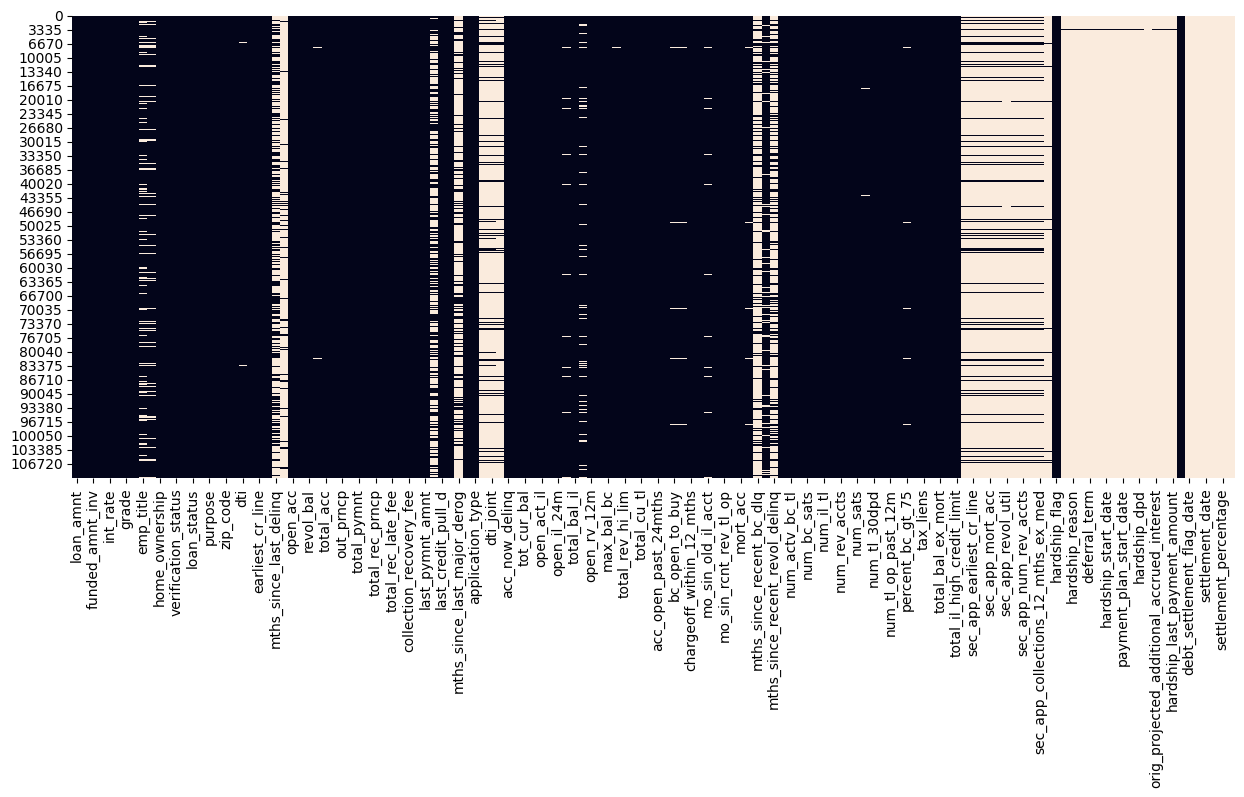

In [7]:
plt.figure(figsize=(15,6))
plot1 = sns.heatmap(df_combined.isnull(), cbar=False) #plotting heatmap to visualise null data in the dataset

In [8]:
#dropping columns with more than 75% of null values
for i in df_combined.columns :
  MV = df_combined[i].isnull().sum()
  missing_values = (MV /len(df_combined[i])) *100
  if missing_values >75:
    print('column name with more than 75 persent missing data ', i)
    print('Percentage of missing data ', missing_values)
    df_combined = df_combined.drop([i],axis=1)

column name with more than 75 persent missing data  mths_since_last_record
Percentage of missing data  90.90578656586217
column name with more than 75 persent missing data  mths_since_last_major_derog
Percentage of missing data  79.77246292526897
column name with more than 75 persent missing data  annual_inc_joint
Percentage of missing data  87.43548269845886
column name with more than 75 persent missing data  dti_joint
Percentage of missing data  87.43548269845886
column name with more than 75 persent missing data  verification_status_joint
Percentage of missing data  88.98117185228264
column name with more than 75 persent missing data  mths_since_recent_bc_dlq
Percentage of missing data  80.65662256469905
column name with more than 75 persent missing data  revol_bal_joint
Percentage of missing data  87.43548269845886
column name with more than 75 persent missing data  sec_app_earliest_cr_line
Percentage of missing data  87.43548269845886
column name with more than 75 persent missing 

In [9]:
#to find no. of null values in all the column
column_na = df_combined.columns[df_combined.isna().any()].tolist()
df_combined[column_na].isna().sum().sort_values(ascending=False)

mths_since_recent_revol_delinq    79386
next_pymnt_d                      63886
mths_since_last_delinq            63869
emp_title                         16270
il_util                           13088
mths_since_recent_inq             10926
emp_length                         9496
mths_since_rcnt_il                 2343
mo_sin_old_il_acct                 2343
bc_util                            1141
percent_bc_gt_75                   1079
bc_open_to_buy                     1078
mths_since_recent_bc               1007
num_tl_120dpd_2m                    691
dti                                 200
hardship_flag                       167
revol_util                          132
last_pymnt_d                         59
all_util                             17
avg_cur_bal                           7
dtype: int64

In [10]:
df_combined.drop(columns=['mths_since_recent_revol_delinq', 'next_pymnt_d', 'mths_since_last_delinq','emp_title'], inplace=True) #deleting columns which have high very high null values so filling them will skew the analysis

In [11]:
column_na = df_combined.columns[df_combined.isna().any()].tolist()
df_combined[column_na].isna().sum().sort_values(ascending=False)

il_util                  13088
mths_since_recent_inq    10926
emp_length                9496
mths_since_rcnt_il        2343
mo_sin_old_il_acct        2343
bc_util                   1141
percent_bc_gt_75          1079
bc_open_to_buy            1078
mths_since_recent_bc      1007
num_tl_120dpd_2m           691
dti                        200
hardship_flag              167
revol_util                 132
last_pymnt_d                59
all_util                    17
avg_cur_bal                  7
dtype: int64

In [12]:
df_combined.dropna(subset=['il_util', 'mths_since_recent_inq' ], inplace=True) #to avoid the mileading data we decided to drop all rows with NaN values in these columns  

In [13]:
column_na = df_combined.columns[df_combined.isna().any()].tolist()
df_combined[column_na].isna().sum().sort_values(ascending=False)

emp_length              6663
bc_util                  865
percent_bc_gt_75         820
bc_open_to_buy           819
mths_since_recent_bc     765
num_tl_120dpd_2m         637
hardship_flag            143
dti                      121
revol_util               101
last_pymnt_d              36
mths_since_rcnt_il        12
mo_sin_old_il_acct        12
dtype: int64

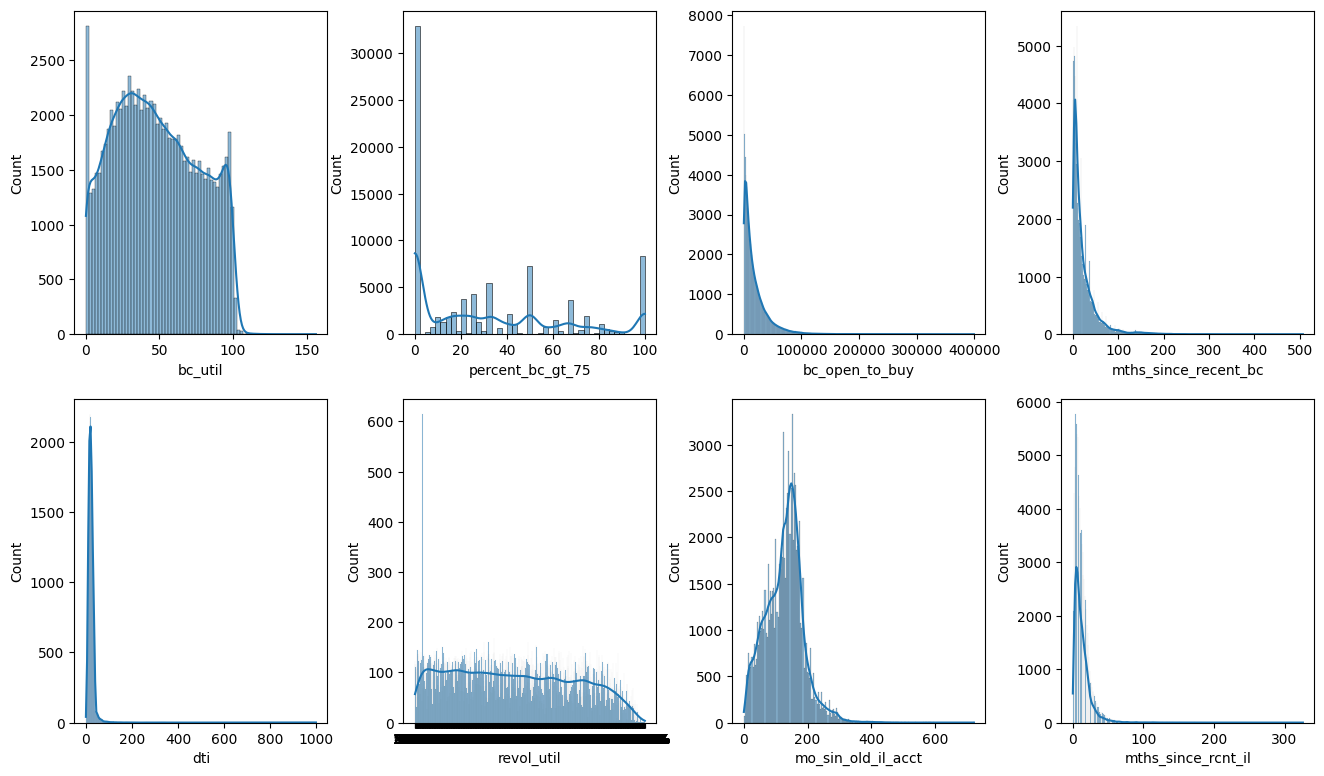

In [14]:
#plotting histplot of columns with null values to visualise their distribution and choose which method to fill na values with
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(16, 8))
axs = axs.flatten() # Reshape the axes array to simplify indexing
sns.histplot(data=df_combined, x='bc_util', kde=True, ax=axs[0]) # Plot on each subplot
sns.histplot(data=df_combined, x='percent_bc_gt_75', kde=True, ax=axs[1])
sns.histplot(data=df_combined, x='bc_open_to_buy', kde=True, ax=axs[2])
sns.histplot(data=df_combined, x='mths_since_recent_bc', kde=True, ax=axs[3])
sns.histplot(data=df_combined, x='dti', kde=True, ax=axs[4])
sns.histplot(data=df_combined, x='revol_util', kde=True, ax=axs[5])
sns.histplot(data=df_combined, x='mo_sin_old_il_acct', kde=True, ax=axs[6])
sns.histplot(data=df_combined, x='mths_since_rcnt_il', kde=True, ax=axs[7])
plt.subplots_adjust(wspace=0.3, top=1)

# Show the plot
plt.show()

In [15]:
#filling na values
df_combined['emp_length'].fillna('< 1 year', inplace = True)
df_combined['bc_util'].fillna(int(df_combined['bc_util'].median()), inplace = True)
df_combined['percent_bc_gt_75'].fillna(int(df_combined['percent_bc_gt_75'].median()), inplace = True)
df_combined['bc_open_to_buy'].fillna(int(df_combined['bc_open_to_buy'].median()), inplace = True)
df_combined['mths_since_recent_bc'].fillna(int(df_combined['mths_since_recent_bc'].median()), inplace = True)
df_combined['dti'].fillna(int(df_combined['dti'].median()), inplace = True)
df_combined['revol_util'] = df_combined['revol_util'].str.rstrip("%").astype("float") / 100
df_combined['revol_util'].fillna(int(df_combined['revol_util'].median()), inplace = True)
df_combined['mo_sin_old_il_acct'].fillna(int(df_combined['mo_sin_old_il_acct'].median()), inplace = True)
df_combined['num_tl_120dpd_2m'].fillna(0, inplace = True)
df_combined['hardship_flag'].fillna('N', inplace = True)
df_combined['mths_since_rcnt_il'].fillna(int(df_combined['mths_since_rcnt_il'].median()), inplace = True)
df_combined['last_pymnt_d'].fillna(method = 'ffill', inplace = True)

In [16]:
df_combined.isna().sum().sort_values(ascending=False) #checking for na values

loan_amnt                0
mths_since_recent_inq    0
mort_acc                 0
mo_sin_rcnt_tl           0
mo_sin_rcnt_rev_tl_op    0
                        ..
out_prncp_inv            0
out_prncp                0
initial_list_status      0
total_acc                0
debt_settlement_flag     0
Length: 99, dtype: int64

In [17]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88892 entries, 0 to 110047
Data columns (total 99 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   88892 non-null  float64
 1   funded_amnt                 88892 non-null  float64
 2   funded_amnt_inv             88892 non-null  float64
 3   term                        88892 non-null  object 
 4   int_rate                    88892 non-null  object 
 5   installment                 88892 non-null  float64
 6   grade                       88892 non-null  object 
 7   sub_grade                   88892 non-null  object 
 8   emp_length                  88892 non-null  object 
 9   home_ownership              88892 non-null  object 
 10  annual_inc                  88892 non-null  float64
 11  verification_status         88892 non-null  object 
 12  issue_d                     88892 non-null  object 
 13  loan_status                 88

<Axes: >

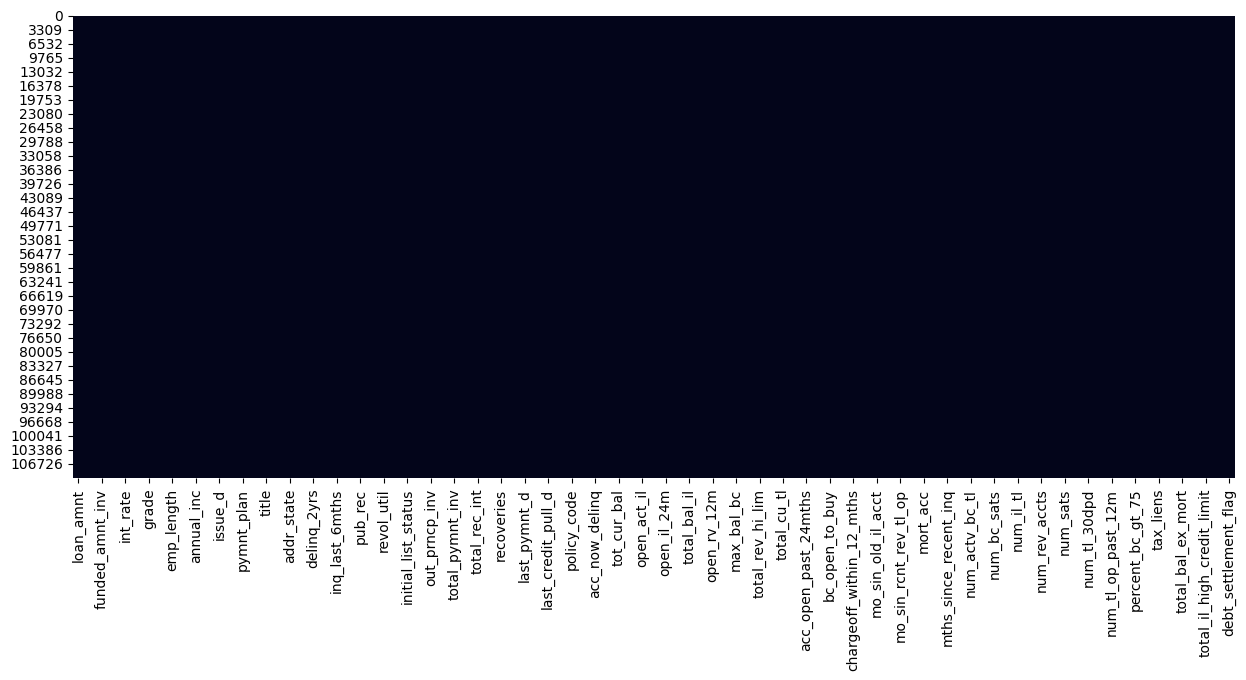

In [18]:
plt.figure(figsize=(15,6))
sns.heatmap(df_combined.isnull(), cbar=False) #to visulaise if na values are present

In [19]:
df_combined.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,18000.00,18000.00,18000.00,60 months,16.08%,438.50,B,B5,10+ years,MORTGAGE,...,100.00,58.80,0.00,0.00,326750.00,228273.00,82200.00,211350.00,N,N
1,20000.00,20000.00,20000.00,36 months,10.19%,647.13,A,A4,4 years,MORTGAGE,...,100.00,25.00,1.00,0.00,301677.00,23721.00,7000.00,32277.00,N,N
2,20000.00,20000.00,20000.00,60 months,15.40%,480.01,B,B4,4 years,MORTGAGE,...,95.10,0.00,0.00,0.00,475610.00,87027.00,12300.00,122810.00,N,N
3,20000.00,20000.00,20000.00,36 months,8.46%,630.99,A,A1,< 1 year,MORTGAGE,...,100.00,0.00,1.00,0.00,101703.00,21177.00,6000.00,10403.00,N,N
4,4800.00,4800.00,4800.00,36 months,10.19%,155.32,A,A4,10+ years,RENT,...,85.00,25.00,0.00,0.00,45151.00,34094.00,7000.00,24602.00,N,N


In [20]:
#droping zipcode column as it has no relevance to target column
df_combined.drop(columns=['zip_code'], inplace=True)

In [21]:
#finding and deleting columns which have no unique value we will be dropping them
no_unique = [i for i in df_combined.columns if df_combined[i].nunique() == 1] #logic that if only 1 kind of value is there then it is not relevant
df_combined.drop(no_unique, axis=1, inplace=True)

In [22]:
pd.set_option('display.max_columns', None)
df_combined

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag
0,18000.00,18000.00,18000.00,60 months,16.08%,438.50,B,B5,10+ years,MORTGAGE,125000.00,Verified,Mar-2021,Current,credit_card,Credit card refinancing,MS,39.05,0.00,Apr-1982,0.00,28.00,0.00,66764.00,0.58,65.00,w,15903.68,15903.68,4368.92,4368.92,2096.32,2272.60,0.00,0.00,0.00,Jan-2022,438.50,Apr-2021,0.00,Individual,0.00,0.00,228273.00,0.00,4.00,0.00,2.00,14.00,161509.00,59.00,1.00,4.00,12953.00,58.00,115400.00,0.00,1.00,0.00,6.00,8153.00,20672.00,74.90,0.00,0.00,159.00,465.00,12.00,12.00,0.00,12.00,14.00,0.00,15.00,18.00,17.00,31.00,20.00,24.00,45.00,18.00,28.00,0.00,0.00,0.00,1.00,100.00,58.80,0.00,326750.00,228273.00,82200.00,211350.00,N
1,20000.00,20000.00,20000.00,36 months,10.19%,647.13,A,A4,4 years,MORTGAGE,52000.00,Verified,Mar-2021,Fully Paid,debt_consolidation,Debt consolidation,AZ,23.66,0.00,Mar-2006,1.00,14.00,1.00,14262.00,0.36,24.00,w,0.00,0.00,21398.32,21398.32,20000.00,1398.32,0.00,0.00,0.00,Dec-2021,15585.47,Feb-2021,0.00,Individual,0.00,0.00,252180.00,1.00,1.00,0.00,0.00,33.00,9459.00,29.00,2.00,3.00,2500.00,33.00,39900.00,1.00,2.00,5.00,4.00,18013.00,2654.00,62.10,0.00,0.00,75.00,103.00,2.00,2.00,2.00,8.00,4.00,0.00,3.00,9.00,4.00,5.00,3.00,12.00,19.00,9.00,14.00,0.00,0.00,0.00,3.00,100.00,25.00,1.00,301677.00,23721.00,7000.00,32277.00,N
2,20000.00,20000.00,20000.00,60 months,15.40%,480.01,B,B4,4 years,MORTGAGE,300000.00,Source Verified,Feb-2021,Current,small_business,Business,FL,9.97,0.00,Aug-2006,0.00,15.00,0.00,4762.00,0.24,41.00,w,17379.35,17379.35,5263.00,5263.00,2620.65,2642.35,0.00,0.00,0.00,Jan-2022,480.01,Mar-2021,0.00,Individual,0.00,0.00,401016.00,2.00,8.00,2.00,6.00,4.00,82265.00,67.00,0.00,1.00,2955.00,61.00,19800.00,1.00,3.00,4.00,7.00,26734.00,9345.00,24.00,0.00,0.00,142.00,174.00,15.00,4.00,5.00,93.00,1.00,1.00,1.00,3.00,4.00,10.00,21.00,6.00,15.00,3.00,15.00,0.00,0.00,0.00,2.00,95.10,0.00,0.00,475610.00,87027.00,12300.00,122810.00,N
3,20000.00,20000.00,20000.00,36 months,8.46%,630.99,A,A1,< 1 year,MORTGAGE,35000.00,Source Verified,Feb-2021,Current,debt_consolidation,Debt consolidation,OH,24.11,0.00,Jul-1994,1.00,12.00,1.00,13855.00,0.47,32.00,w,14416.04,14416.04,6931.49,6931.49,5583.96,1347.53,0.00,0.00,0.00,Jan-2022,630.99,Mar-2021,0.00,Joint App,0.00,0.00,83177.00,1.00,2.00,0.00,1.00,13.00,7322.00,70.00,0.00,2.00,3076.00,53.00,29300.00,0.00,9.00,3.00,4.00,6931.00,2924.00,51.30,0.00,0.00,145.00,318.00,18.00,1.00,3.00,29.00,2.00,0.00,1.00,3.00,2.00,3.00,12.00,9.00,17.00,3.00,12.00,0.00,0.00,0.00,1.00,100.00,0.00,1.00,101703.00,21177.00,6000.00,10403.00,N
4,4800.00,4800.00,4800.00,36 months,10.19%,155.32,A,A4,10+ years,RENT,72000.00,Verified,Feb-2021,Current,debt_consolidation,Debt consolidation,M

In [23]:
#removing % from int_rate
df_combined['int_rate'] = df_combined['int_rate'].str.rstrip("%").astype("float") / 100

In [24]:
#building correlation matrix
corr_matrix = df_combined.corr().abs()
corr_matrix

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
loan_amnt,1.00,1.00,1.00,0.07,0.93,0.22,0.06,0.02,0.06,0.17,0.06,0.35,0.11,0.18,0.41,0.41,0.87,0.87,0.78,0.66,0.01,0.08,0.08,0.43,0.02,0.01,0.02,0.29,0.05,0.04,0.07,0.02,0.05,0.16,0.10,0.05,0.05,0.39,0.00,0.35,0.06,0.09,0.01,0.03,0.21,0.21,0.08,0.01,0.00,0.13,0.16,0.04,0.06,0.21,0.03,0.03,0.07,0.18,0.14,0.19,0.18,0.10,0.15,0.14,0.14,0.17,0.00,0.00,0.03,0.06,0.10,0.04,0.06,0.32,0.28,0.36,0.23
funded_amnt,1.00,1.00,1.00,0.07,0.93,0.22,0.06,0.02,0.06,0.17,0.06,0.35,0.11,0.18,0.41,0.41,0.87,0.87,0.78,0.66,0.01,0.08,0.08,0.43,0.02,0.01,0.02,0.29,0.05,0.04,0.07,0.02,0.05,0.16,0.10,0.05,0.05,0.39,0.00,0.35,0.06,0.09,0.01,0.03,0.21,0.21,0.08,0.01,0.00,0.13,0.16,0.04,0.06,0.21,0.03,0.03,0.07,0.18,0.14,0.19,0.18,0.10,0.15,0.14,0.14,0.17,0.00,0.00,0.03,0.06,0.10,0.04,0.06,0.32,0.28,0.36,0.23
funded_amnt_inv,1.00,1.00,1.00,0.07,0.93,0.22,0.06,0.02,0.06,0.17,0.06,0.35,0.11,0.18,0.41,0.41,0.87,0.87,0.78,0.66,0.01,0.08,0.08,0.43,0.02,0.01,0.02,0.29,0.05,0.04,0.07,0.02,0.05,0.16,0.10,0.05,0.05,0.39,0.00,0.35,0.06,0.09,0.01,0.03,0.21,0.21,0.08,0.01,0.00,0.13,0.16,0.04,0.06,0.21,0.03,0.03,0.07,0.18,0.14,0.19,0.18,0.10,0.15,0.14,0.14,0.17,0.00,0.00,0.03,0.06,0.10,0.04,0.06,0.32,0.28,0.36,0.23
int_rate,0.07,0.07,0.07,1.00,0.01,0.05,0.09,0.10,0.10,0.01,0.04,0.01,0.32,0.02,0.01,0.01,0.02,0.02,0.14,0.36,0.02,0.10,0.10,0.02,0.03,0.04,0.03,0.07,0.09,0.03,0.11,0.11,0.07,0.02,0.13,0.08,0.09,0.04,0.34,0.21,0.11,0.01,0.10,0.12,0.07,0.30,0.33,0.02,0.01,0.04,0.11,0.06,0.08,0.11,0.05,0.08,0.09,0.06,0.11,0.04,0.07,0.02,0.00,0.04,0.11,0.01,0.02,0.03,0.05,0.12,0.14,0.31,0.04,0.12,0.02,0.24,0.01
installment,0.93,0.93,0.93,0.01,1.00,0.22,0.07,0.00,0.05,0.17,0.05,0.35,0.16,0.16,0.28,0.28,0.85,0.85,0.79,0.60,0.01,0.09,0.09,0.40,0.01,0.00,0.01,0.26,0.04,0.04,0.05,0.01,0.04,0.15,0.10,0.03,0.03,0.38,0.04,0.32,0.04,0.07,0.01,0.01,0.18,0.16,0.13,0.01,0.00,0.11,0.14,0.03,0.05,0.17,0.01,0.02,0.05,0.20,0.16,0.19,0.17,0.08,0.15,0.13,0.17,0.17,0.00,0.00,0.02,0.04,0.07,0.09,0.05,0.29,0.27,0.33,0.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pub_rec_bankruptcies,0.06,0.06,0.06,0.04,0.05,0.03,0.01,0.04,0.06,0.02,1.00,0.08,0.06,0.02,0.04,0.04,0.04,0.04,0.04,0.02,0.01,0.01,0.01,0.00,0.01,0.00,0.01,0.06,0.05,0.02,0.04,0.04,0.03,0.02,0.03,0.08,0.11,0.11,0.01,0.09,0.09,0.01,0.08,0.11,0.06,0.08,0.04,0.01,0.00,0.00,0.04,0.07,0.05,0.05,0.06,0.05,0.04,0.05,0.01,0.04,0.01,0.01,0.04,0.05,0.01,0.01,0.00,0.00,0.01,0.08,0.07,0.04,1.00,0.07,0.05,0.12,0.04
tot_hi_cred_lim,0.32,0.32,0.32,0.12,0.29,0.31,0.04,0.04,0.03,0.32,0.07,0.46,0.03,0.38,0.10,0.10,0.30,0.30,0.30,0.14,0.00,0.01,0.02,0.21,0.01,0.00,0.01,0.98,0.12,0.18,0.14,0.18,0.10,0.41,0

<Axes: >

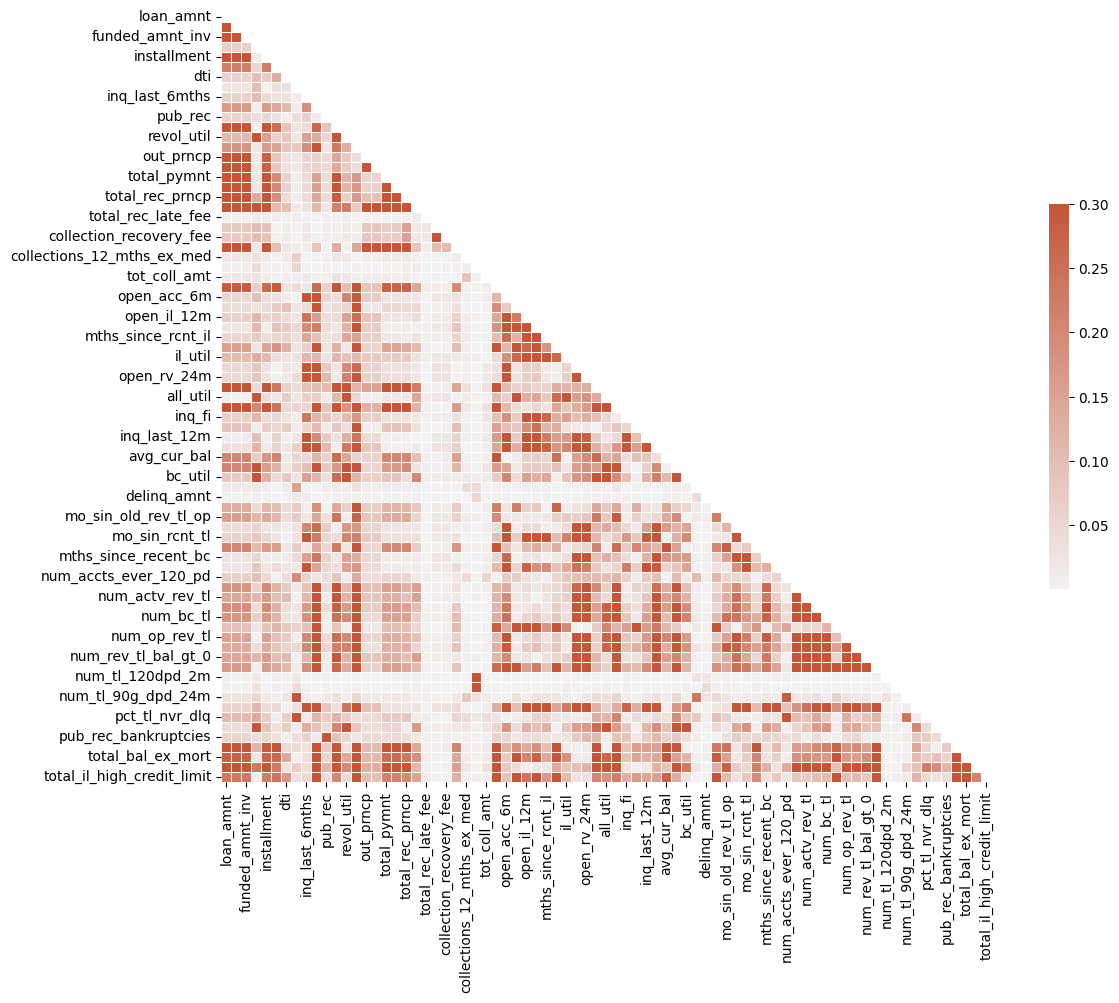

In [25]:
# Generating a triangle heatmap for visualising correlation
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
f, ax = plt.subplots(figsize=(15, 10))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [26]:
# dropping highly correlated columns
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
high_corr_cols = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]
df_combined = df_combined.drop(high_corr_cols, axis=1)
df_combined

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,bc_open_to_buy,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_il_tl,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,pct_tl_nvr_dlq,hardship_flag
0,18000.00,60 months,0.16,B,B5,10+ years,MORTGAGE,125000.00,Verified,Mar-2021,Current,credit_card,Credit card refinancing,MS,39.05,0.00,Apr-1982,0.00,28.00,0.00,66764.00,0.58,65.00,w,15903.68,2272.60,0.00,0.00,Jan-2022,438.50,Apr-2021,0.00,Individual,0.00,0.00,228273.00,0.00,4.00,0.00,2.00,14.00,161509.00,59.00,1.00,4.00,12953.00,58.00,115400.00,0.00,1.00,0.00,20672.00,0.00,0.00,159.00,465.00,12.00,12.00,0.00,12.00,14.00,0.00,15.00,20.00,0.00,0.00,0.00,100.00,N
1,20000.00,36 months,0.10,A,A4,4 years,MORTGAGE,52000.00,Verified,Mar-2021,Fully Paid,debt_consolidation,Debt consolidation,AZ,23.66,0.00,Mar-2006,1.00,14.00,1.00,14262.00,0.36,24.00,w,0.00,1398.32,0.00,0.00,Dec-2021,15585.47,Feb-2021,0.00,Individual,0.00,0.00,252180.00,1.00,1.00,0.00,0.00,33.00,9459.00,29.00,2.00,3.00,2500.00,33.00,39900.00,1.00,2.00,5.00,2654.00,0.00,0.00,75.00,103.00,2.00,2.00,2.00,8.00,4.00,0.00,3.00,3.00,0.00,0.00,0.00,100.00,N
2,20000.00,60 months,0.15,B,B4,4 years,MORTGAGE,300000.00,Source Verified,Feb-2021,Current,small_business,Business,FL,9.97,0.00,Aug-2006,0.00,15.00,0.00,4762.00,0.24,41.00,w,17379.35,2642.35,0.00,0.00,Jan-2022,480.01,Mar-2021,0.00,Individual,0.00,0.00,401016.00,2.00,8.00,2.00,6.00,4.00,82265.00,67.00,0.00,1.00,2955.00,61.00,19800.00,1.00,3.00,4.00,9345.00,0.00,0.00,142.00,174.00,15.00,4.00,5.00,93.00,1.00,1.00,1.00,21.00,0.00,0.00,0.00,95.10,N
3,20000.00,36 months,0.08,A,A1,< 1 year,MORTGAGE,35000.00,Source Verified,Feb-2021,Current,debt_consolidation,Debt consolidation,OH,24.11,0.00,Jul-1994,1.00,12.00,1.00,13855.00,0.47,32.00,w,14416.04,1347.53,0.00,0.00,Jan-2022,630.99,Mar-2021,0.00,Joint App,0.00,0.00,83177.00,1.00,2.00,0.00,1.00,13.00,7322.00,70.00,0.00,2.00,3076.00,53.00,29300.00,0.00,9.00,3.00,2924.00,0.00,0.00,145.00,318.00,18.00,1.00,3.00,29.00,2.00,0.00,1.00,12.00,0.00,0.00,0.00,100.00,N
4,4800.00,36 months,0.10,A,A4,10+ years,RENT,72000.00,Verified,Feb-2021,Current,debt_consolidation,Debt consolidation,MI,16.75,0.00,Mar-1992,0.00,10.00,0.00,7201.00,0.55,20.00,w,2863.25,369.05,0.00,0.00,Jan-2022,155.32,Oct-2021,0.00,Individual,0.00,0.00,34094.00,0.00,2.00,1.00,3.00,7.00,21203.00,86.00,1.00,2.00,1516.00,76.00,13200.00,1.00,6.00,2.00,2559.00,0.00,0.00,146.00,306.00,12.00,7.00,2.00,14.00,8.00,2.00,4.00,9.00,0.00,0.00,0.00,85.00,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110041,15000.00,36 months,0.18,C,C5,1 year,RENT,62000.00,Source Verified,Jan-2020,Current,credit_card,Credit card refinancing,IL,32.97,0.00,Jun-2006,1.00,11.00,0.00,16490.00,0.46,40.00,w,1213.21,4253.87,0.00,0.00,Aug-2022,540.34,Jun-2022,0.00,Individual,0.00,0.00,136496.00,2.00,5.00,2.00,5.00,6.00,120006.00,87.00,1.00,1.00,4847.00,71.00,35900.00,4.00,2.00,2.00,18760.00,0.00,0.00,160.00,162.00,5.00,5.00,1.00,30.00,5.00,0.00,4.00,29.00,0.00,0.00,0.00,97.40,N
110042,6000.00,36 months,0.11,B,B2,10+ years,MOR

In [27]:
high_corr_cols

['funded_amnt',
 'funded_amnt_inv',
 'installment',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'collection_recovery_fee',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_util',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_op_past_12m',
 'percent_bc_gt_75',
 'pub_rec_bankruptcies',
 'tot_hi_cred_lim',
 'total_bal_ex_mort',
 'total_bc_limit',
 'total_il_high_credit_limit']

In [28]:
df_combined['loan_status'].value_counts()

Fully Paid            46806
Current               34197
Charged Off            6345
Late (31-120 days)      646
In Grace Period         633
Late (16-30 days)       251
Default                  14
Name: loan_status, dtype: int64

In [29]:
# Converting  target column values to low risk and high risk based on their values
a = dict.fromkeys(['Fully Paid', 'Current'], 'low risk') 
b = dict.fromkeys(['Late (31-120 days)', 'Late (16-30 days)', 'Default', 'In Grace Period', 'Charged Off'], 'high risk')    
df_combined = df_combined.replace(a)
df_combined = df_combined.replace(b)

In [30]:
df_combined['loan_status'].value_counts()

low risk     81003
high risk     7889
Name: loan_status, dtype: int64

In [31]:
df_combined['emp_length'].value_counts()

10+ years    25831
< 1 year     17847
2 years       8292
3 years       7197
1 year        6243
5 years       5942
4 years       5425
6 years       3990
7 years       3212
8 years       2807
9 years       2106
Name: emp_length, dtype: int64

In [32]:
#Replacing emp_length 10 categories to three categories
emp_len_dict = {
    "< 1 year": "novice",
    "1 year": "novice",
    "2 years": "novice",
    "3 years": "novice",
    "4 years": "average",
    "5 years": "average",
    "6 years": "average",
    "7 years": "professional",
    "8 years": "professional",
    "9 years": "professional",
    "10+ years": "professional"
}
df_combined['emp_length']= df_combined['emp_length'].map(emp_len_dict)

In [33]:
df_combined['emp_length'].value_counts()

novice          39579
professional    33956
average         15357
Name: emp_length, dtype: int64

In [34]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88892 entries, 0 to 110047
Data columns (total 69 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   88892 non-null  float64
 1   term                        88892 non-null  object 
 2   int_rate                    88892 non-null  float64
 3   grade                       88892 non-null  object 
 4   sub_grade                   88892 non-null  object 
 5   emp_length                  88892 non-null  object 
 6   home_ownership              88892 non-null  object 
 7   annual_inc                  88892 non-null  float64
 8   verification_status         88892 non-null  object 
 9   issue_d                     88892 non-null  object 
 10  loan_status                 88892 non-null  object 
 11  purpose                     88892 non-null  object 
 12  title                       88892 non-null  object 
 13  addr_state                  88

In [35]:
#splitting into numerical and categorical datasets
df_num = df_combined.select_dtypes(include=['float64']).copy()
df_obj = df_combined.select_dtypes(include=['object']).copy()

In [36]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88892 entries, 0 to 110047
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   88892 non-null  float64
 1   int_rate                    88892 non-null  float64
 2   annual_inc                  88892 non-null  float64
 3   dti                         88892 non-null  float64
 4   delinq_2yrs                 88892 non-null  float64
 5   inq_last_6mths              88892 non-null  float64
 6   open_acc                    88892 non-null  float64
 7   pub_rec                     88892 non-null  float64
 8   revol_bal                   88892 non-null  float64
 9   revol_util                  88892 non-null  float64
 10  total_acc                   88892 non-null  float64
 11  out_prncp                   88892 non-null  float64
 12  total_rec_int               88892 non-null  float64
 13  total_rec_late_fee          88

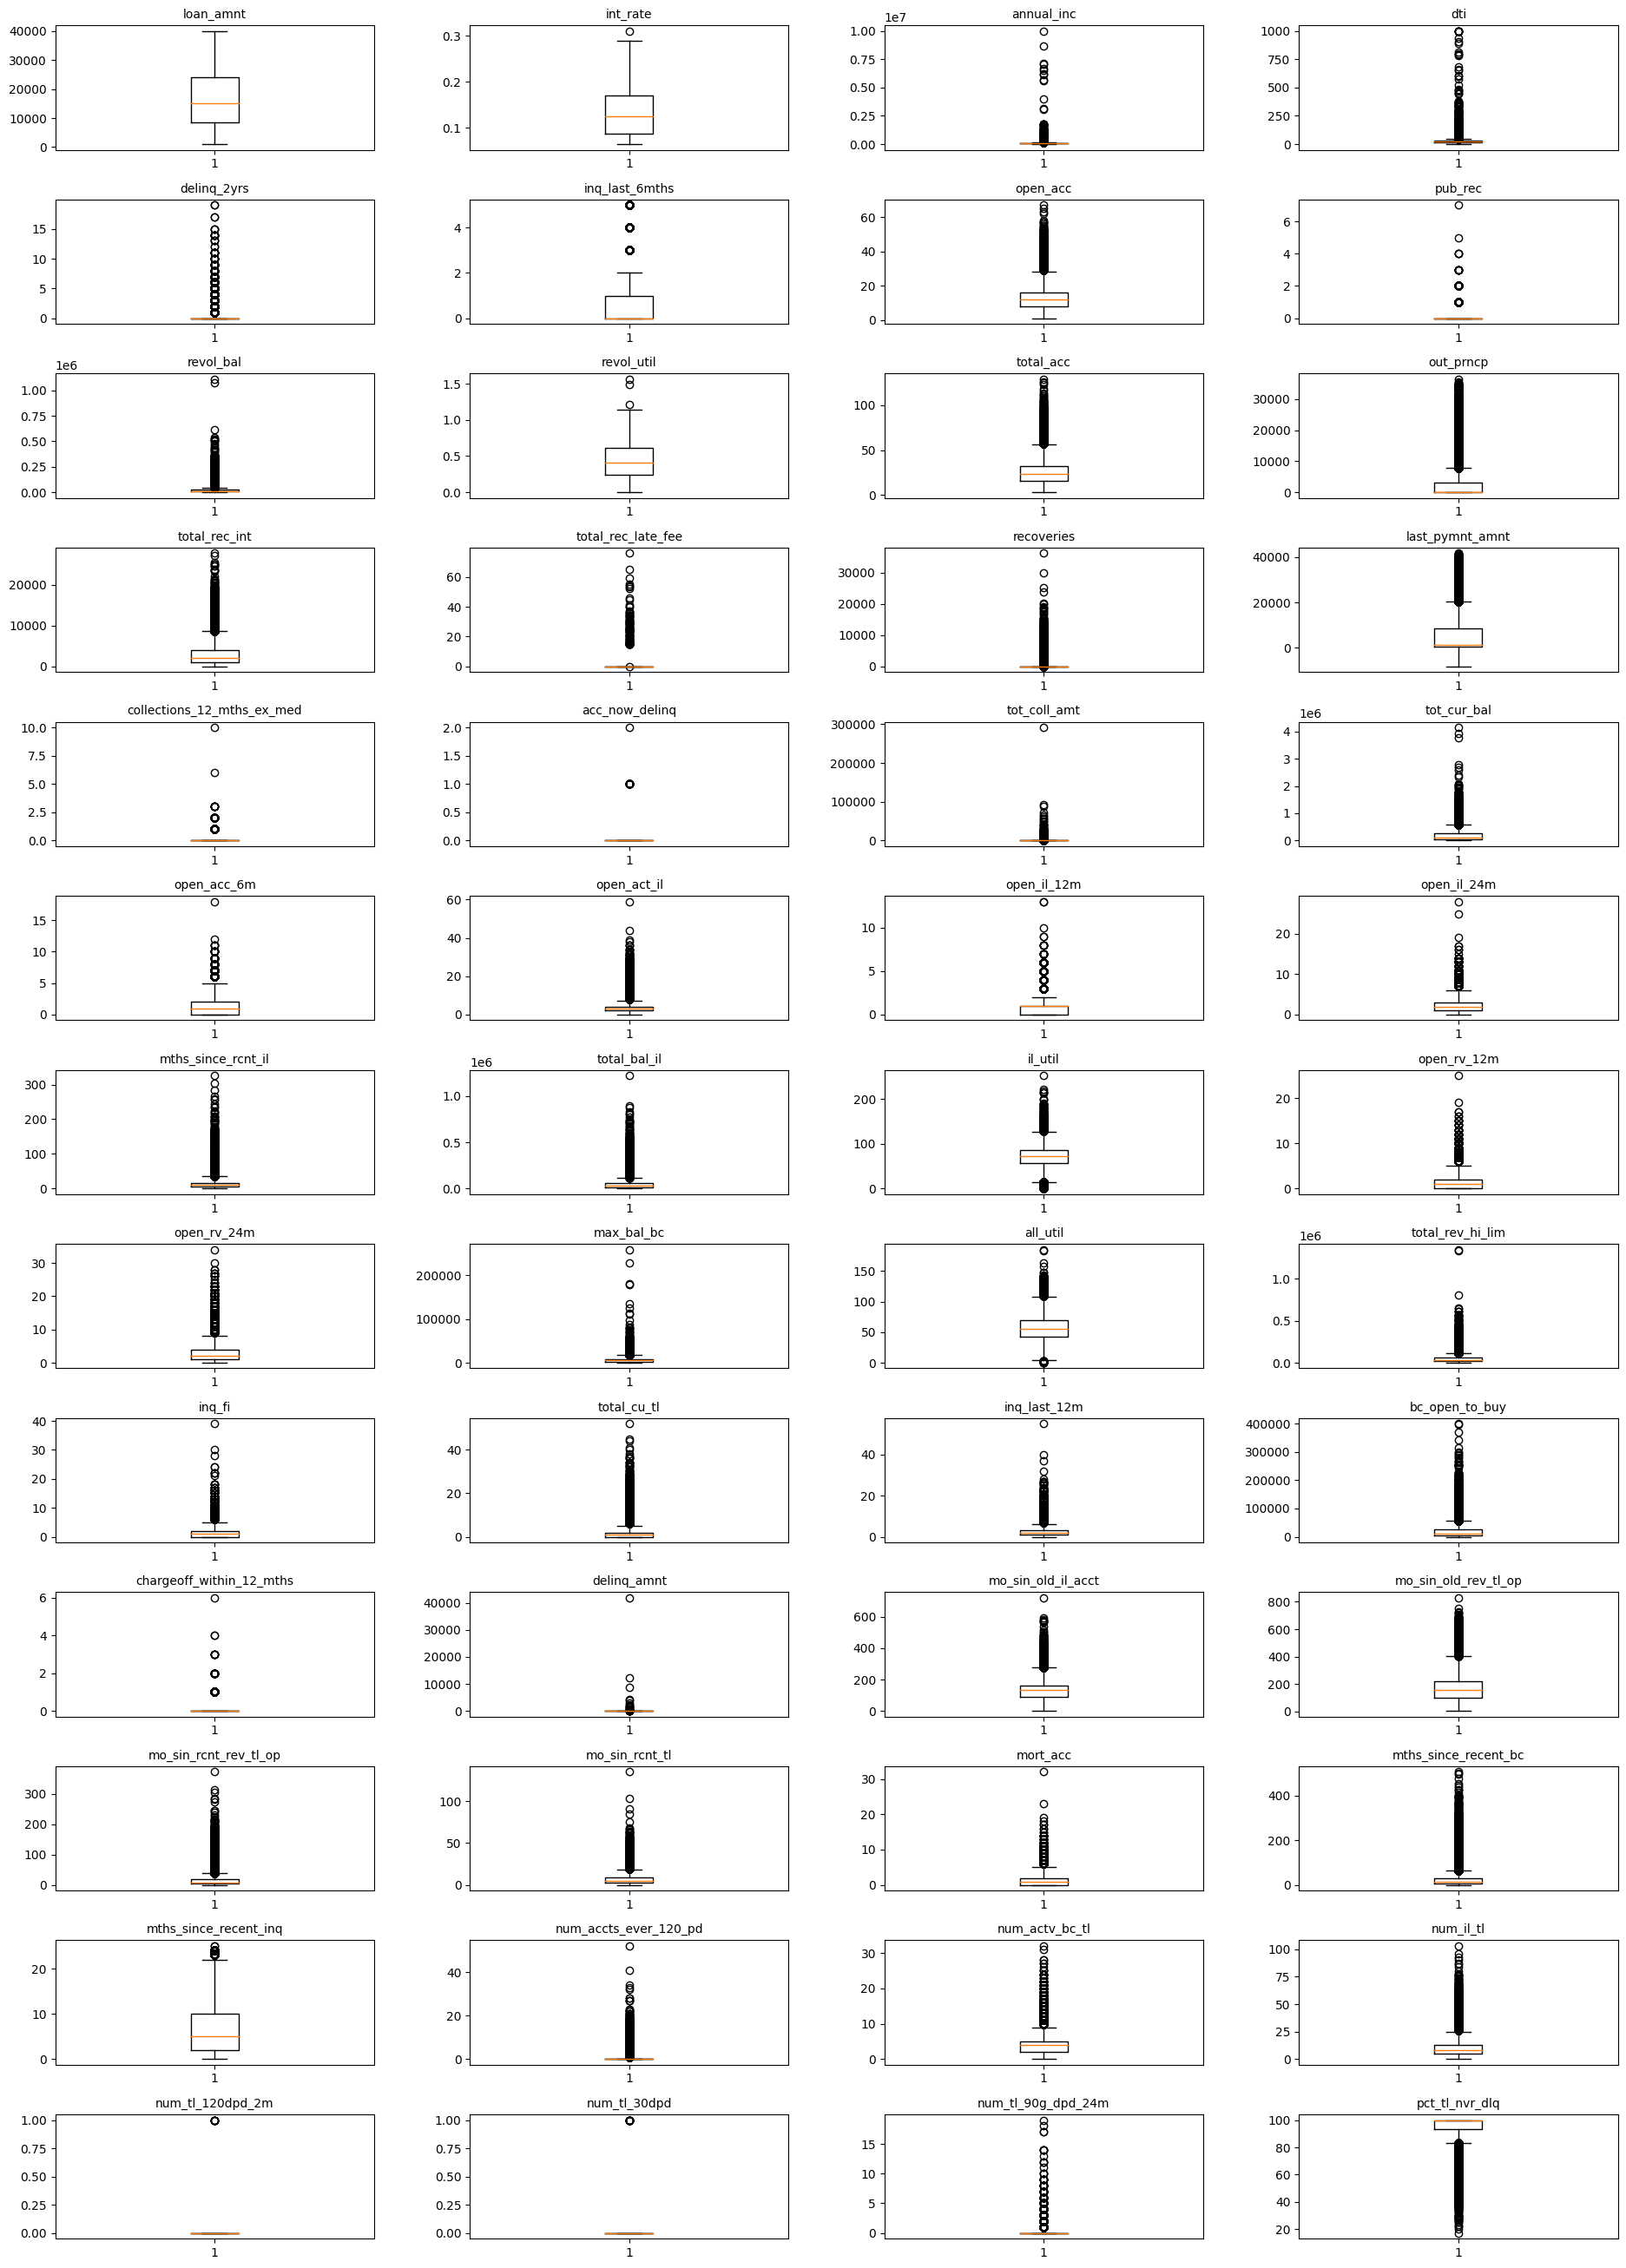

In [37]:
#building box plot to check for outliers in numerical columns
fig, axs = plt.subplots(13, 4,figsize= (20,30) )
count = 0
for i in range(13):
  for j in range(4):
    axs[i, j].boxplot(df_num[df_num.columns[count]])
    axs[i, j].set_title(df_num.columns[count], fontsize=10)
    count += 1
fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)

In [38]:
df_num['annual_inc']

0        125000.00
1         52000.00
2        300000.00
3         35000.00
4         72000.00
            ...   
110041    62000.00
110042    80000.00
110043    40000.00
110044    80000.00
110047    78000.00
Name: annual_inc, Length: 88892, dtype: float64

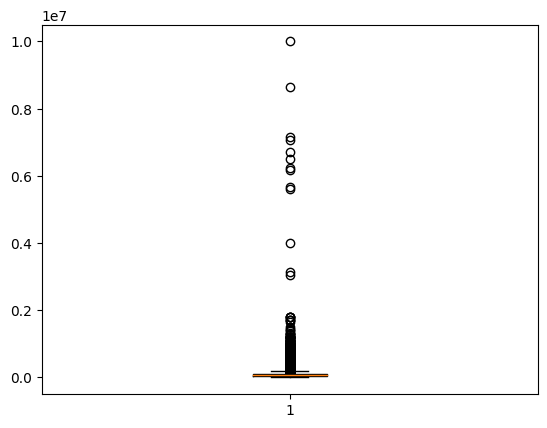

In [39]:
box = plt.boxplot(df_num['annual_inc'])

In [40]:
#using interquartile range to remove outliers in the annual income attribute as wrong income might be entered
q1, q3 = np.percentile(df_num['annual_inc'], [25, 75])
iqr = iqr(df_num['annual_inc'])
outlier_indices = np.where((df_num['annual_inc'] < (q1 - 1.5 * iqr)) | (df_num['annual_inc']> (q3 + 1.5 * iqr)))[0]

In [41]:
#removing those indices from the datasets
df_num.drop(df_num.index[outlier_indices], inplace=True)
df_obj.drop(df_obj.index[outlier_indices], inplace=True)

># **4- Exploratory Data Analysis**

In [47]:
df_combined.describe()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,bc_open_to_buy,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_il_tl,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,pct_tl_nvr_dlq
count,88892.00,88892.00,88892.00,88892.00,88892.00,88892.00,88892.00,88892.00,88892.00,88892.00,88892.00,88892.00,88892.00,88892.00,88892.00,88892.00,88892.00,88892.00,88892.00,88892.00,88892.00,88892.00,88892.00,88892.00,88892.00,88892.00,88892.00,88892.00,88892.00,88892.00,88892.00,88892.00,88892.00,88892.00,88892.00,88892.00,88892.00,88892.00,88892.00,88892.00,88892.00,88892.00,88892.00,88892.00,88892.00,88892.00,88892.00,88892.00,88892.00,88892.00,88892.00,88892.00
mean,16571.54,0.13,90949.73,22.56,0.21,0.62,12.80,0.10,18642.52,0.43,25.19,2953.50,2919.76,0.03,122.11,5477.74,0.01,0.00,160.48,166462.52,1.12,3.40,0.93,2.04,13.14,45638.53,69.95,1.28,2.59,6603.39,56.03,44958.68,1.47,1.75,2.32,18699.37,0.01,0.98,127.99,171.47,14.51,6.69,1.42,23.24,6.98,0.46,4.04,10.00,0.00,0.00,0.05,95.23
std,10261.09,0.05,102456.13,19.03,0.71,0.85,6.12,0.30,23252.41,0.25,12.62,5595.10,2705.46,0.98,789.82,7690.51,0.13,0.02,1526.76,177723.94,1.23,3.02,1.02,1.59,12.66,50860.87,21.96,1.50,2.51,6102.12,18.89,39755.16,1.53,2.94,2.35,22131.05,0.09,151.39,58.72,98.04,18.02,5.87,1.78,30.80,5.79,1.41,2.61,7.74,0.01,0.02,0.39,8.23
min,1000.00,0.06,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,3.00,0.00,0.00,0.00,0.00,-8200.71,0.00,0.00,0.00,112.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,17.10
25%,8500.00,0.09,53000.00,14.65,0.00,0.00,8.00,0.00,6552.00,0.24,16.00,0.00,962.29,0.00,0.00,367.47,0.00,0.00,0.00,37132.00,0.00,2.00,0.00,1.00,5.00,15377.75,57.00,0.00,1.00,2601.00,43.00,20100.00,0.00,0.00,1.00,4116.00,0.00,0.00,87.00,98.00,4.00,3.00,0.00,5.00,2.00,0.00,2.00,5.00,0.00,0.00,0.00,93.30
50%,15000.00,0.12,75000.00,20.69,0.00,0.00,12.00,0.00,12761.50,0.41,23.00,0.00,2071.77,0.00,0.00,1123.06,0.00,0.00,0.00,96112.50,1.00,3.00,1.00,2.00,10.00,30679.00,72.00,1.00,2.00,5040.00,56.00,34400.00,1.00,1.00,2.00,11377.00,0.00,0.00,132.00,156.00,8.00,5.00,1.00,13.00,5.00,0.00,4.00,8.00,0.00,0.00,0.00,100.00
75%,23931.25,0.17,107110.52,27.63,0.00,1.00,16.00,0.00,22789.50,0.62,32.00,3121.77,4039.90,0.00,0.00,8369.82,0.00,0.00,0.00,251310.25,2.00,4.00,1.00,3.00,17.00,57441.00,85.00,2.00,4.00,8778.00,69.00,57500.00,2.00,2.00,3.00,25297.75,0.00,0.00,163.00,221.00,18.00,9.00,2.00,29.00,10.00,0.00,5.00,13.00,0.00,0.00,0.00,100.00
max,40000.00,0.31,9999999.00,999.00,19.00,5.00,67.00,7.00,1107809.00,1.56,129.00,36356.11,27746.85,75.88,36195.88,41634.50,10.00,2.00,291697.00,4155654.00,18.00,59.00,13.00,28.00,326.00,1221659.00,252.00,25.00,34.00,259024.00,185.00,1349000.00,39.00,52.00,55.00,399158.00,6.00,41845.00,722.00,829.00,372.00,135.00,32.00,507.00,25.00,52.00,32.00,103.00,1.00,1.00,19.00,100.00


In [48]:
sum(df_combined['loan_amnt'])

1473077350.0

In [49]:
df_combined.shape

(88892, 69)

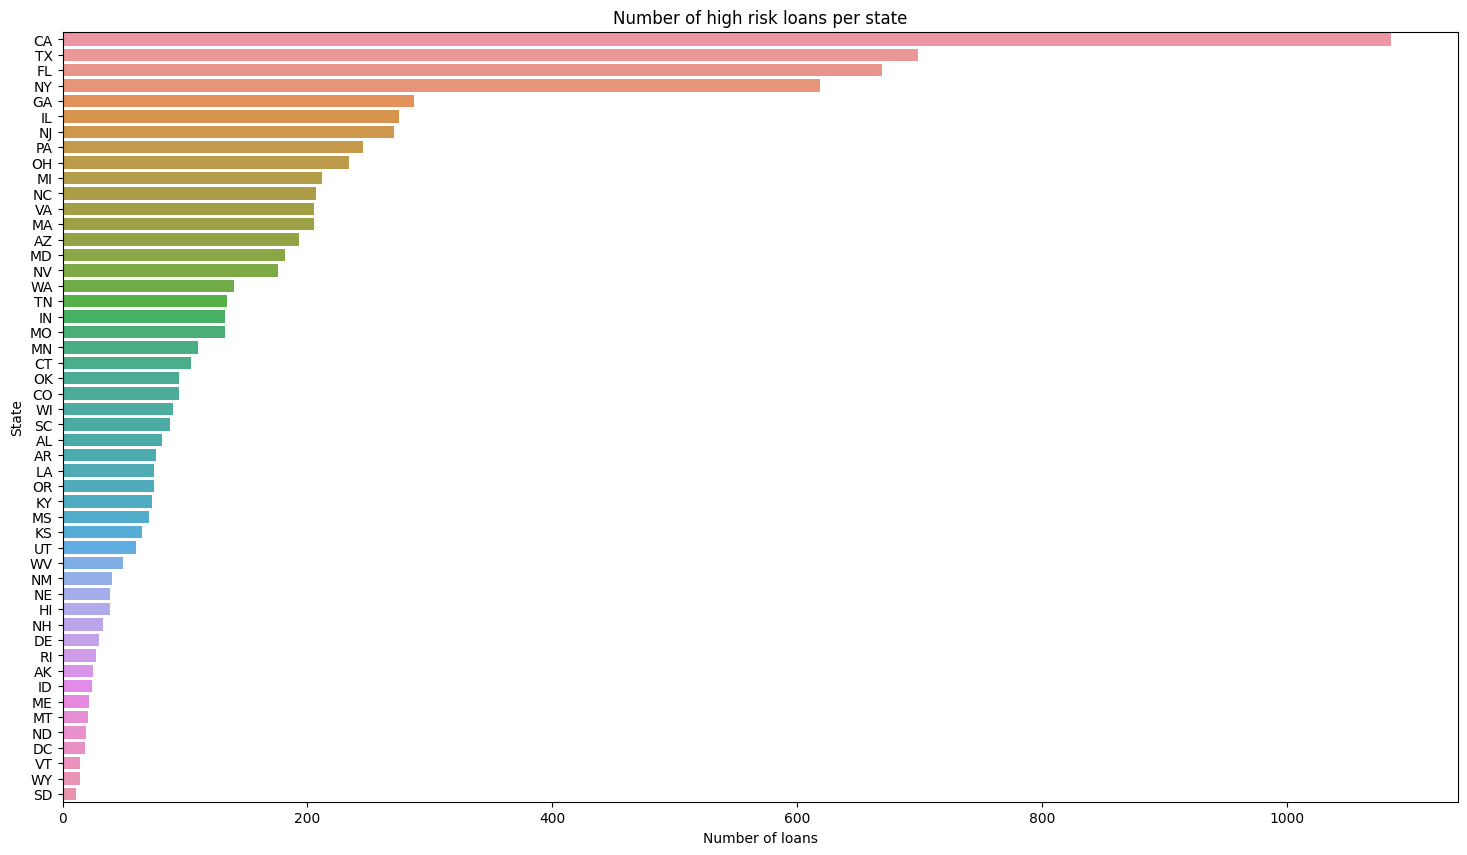

In [50]:
#plotting high risk loans per state
fig = plt.figure(figsize=(18,10))
df_grp = df_combined[df_combined['loan_status']=='high risk'].groupby('addr_state')['loan_status'].count().sort_values(ascending=False).to_frame()
sns.barplot(x = df_grp['loan_status'],
            y = df_grp.index,
            data = df_combined)
plt.ylabel('State')
plt.xlabel('Number of loans')
plt.title('Number of high risk loans per state');

In [51]:
#plotting chloropleth map
fig = px.choropleth(df_grp, locations=df_grp.index, locationmode='USA-states', color='loan_status',
                    color_continuous_scale='Reds',
                    range_color=(0, max(df_grp['loan_status'])),
                    scope='usa',
                    title='High Risk Loan Counts by US State')
fig.show()

In [52]:
#plotting sunburst chart for loan amoynt int rate and term
df_vis1 = df_combined.sample(n = 20, random_state = 2)
fig=px.sunburst(df_vis1, path=['loan_amnt','int_rate','term'],values='loan_amnt',width=800,height=600)
fig.show()

Text(0.5, 1.0, 'Loan Amount vs Count')

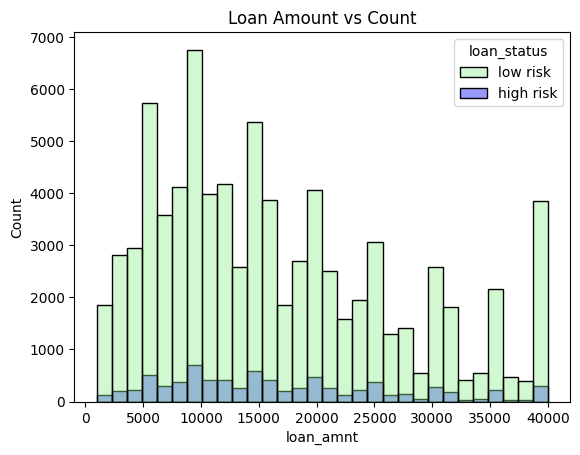

In [53]:
#plotting histplot for loan risk with respect to amount borrowed
vis2 = sns.histplot(data=df_combined,
    x='loan_amnt', hue='loan_status', stat='count',
      bins=30, alpha=0.4, palette=['lightgreen', 'blue'] )
plt.title('Loan Amount vs Count')

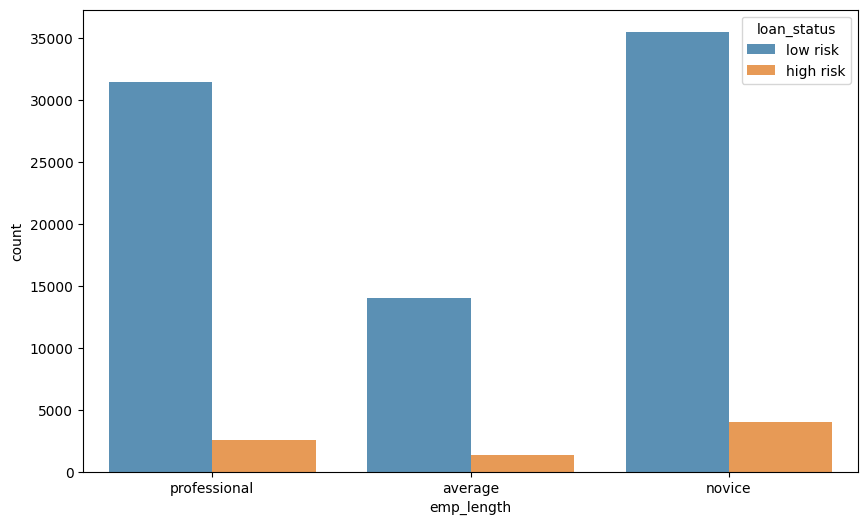

In [54]:
#countplot for credit risk with respect to employement length
plt.figure(figsize=(10,6))
vis3 = sns.countplot(x='emp_length', data=df_combined, hue='loan_status', alpha=0.8)

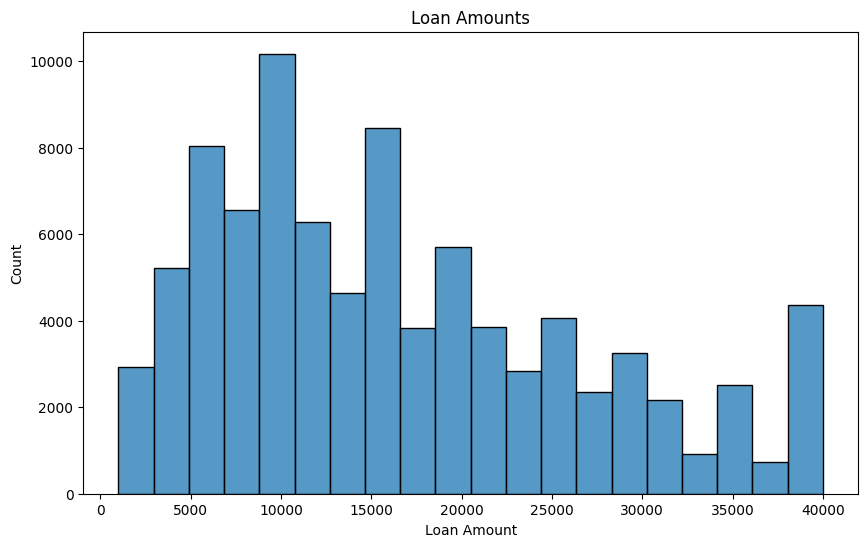

In [55]:
#plotting histplot for count vs loan amounts
plt.figure(figsize=(10, 6))
vis4 = sns.histplot(df_combined['loan_amnt'], bins=20)
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.title('Loan Amounts')
plt.show()


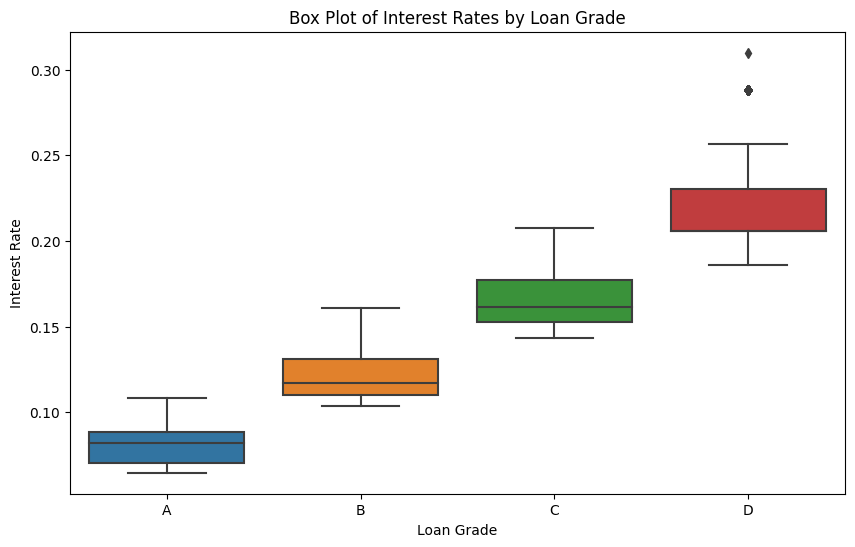

In [56]:
plt.figure(figsize=(10, 6))
vis5 = sns.boxplot(x='grade', y='int_rate', data=df_combined, order=['A', 'B', 'C', 'D'])
plt.xlabel('Loan Grade')
plt.ylabel('Interest Rate')
plt.title('Box Plot of Interest Rates by Loan Grade')
plt.show()

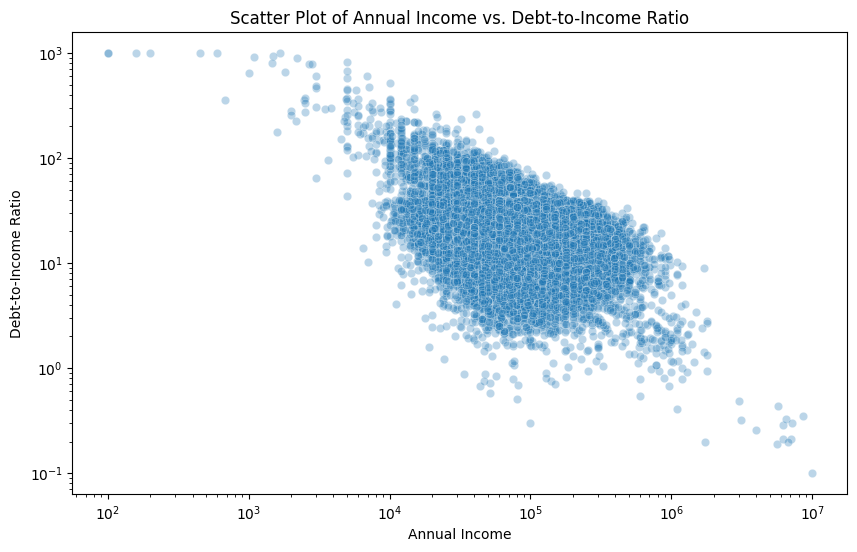

In [57]:
plt.figure(figsize=(10, 6))
vis6 = sns.scatterplot(x='annual_inc', y='dti', data=df_combined, alpha=0.3)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Annual Income')
plt.ylabel('Debt-to-Income Ratio')
plt.title('Scatter Plot of Annual Income vs. Debt-to-Income Ratio')
plt.show()


># **5- Model Selection and Exploration**

In [44]:
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84086 entries, 0 to 110047
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   term                 84086 non-null  object
 1   grade                84086 non-null  object
 2   sub_grade            84086 non-null  object
 3   emp_length           84086 non-null  object
 4   home_ownership       84086 non-null  object
 5   verification_status  84086 non-null  object
 6   issue_d              84086 non-null  object
 7   loan_status          84086 non-null  object
 8   purpose              84086 non-null  object
 9   title                84086 non-null  object
 10  addr_state           84086 non-null  object
 11  earliest_cr_line     84086 non-null  object
 12  initial_list_status  84086 non-null  object
 13  last_pymnt_d         84086 non-null  object
 14  last_credit_pull_d   84086 non-null  object
 15  application_type     84086 non-null  object
 16  har

In [45]:
#using label encoder to encode categorical variables
le = LabelEncoder()
df_obj['hardship_flag'] = le.fit_transform(df_obj['hardship_flag'])
df_obj['emp_length'] = le.fit_transform(df_obj['emp_length'])
df_obj['sub_grade'] = le.fit_transform(df_obj['sub_grade'])
df_obj['grade'] = le.fit_transform(df_obj['grade'])
df_obj['loan_status'] = le.fit_transform(df_obj['loan_status'])

In [46]:
#dropping date columns
df_obj.drop(columns=['issue_d', 'earliest_cr_line', 'last_pymnt_d','last_credit_pull_d'], inplace=True)

In [47]:
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84086 entries, 0 to 110047
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   term                 84086 non-null  object
 1   grade                84086 non-null  int64 
 2   sub_grade            84086 non-null  int64 
 3   emp_length           84086 non-null  int64 
 4   home_ownership       84086 non-null  object
 5   verification_status  84086 non-null  object
 6   loan_status          84086 non-null  int64 
 7   purpose              84086 non-null  object
 8   title                84086 non-null  object
 9   addr_state           84086 non-null  object
 10  initial_list_status  84086 non-null  object
 11  application_type     84086 non-null  object
 12  hardship_flag        84086 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 9.0+ MB


In [48]:
#hot encoding categorical variables
df_obj = pd.get_dummies(df_obj, drop_first = True)
df_obj

,grade,sub_grade,emp_length,loan_status,hardship_flag,term_ 60 months,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,title_Car financing,title_Credit card refinancing,title_Debt consolidation,title_Green loan,title_Home buying,title_Home improvement,title_Major purchase,title_Medical expenses,title_Moving and relocation,title_Other,title_Vacation,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w,application_type_Joint App
0,1,9,2,1,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,3,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,0,3,2,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8,0,3,2,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110041,2,14,1,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
110042,1,6,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
110043,0,2,2,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
110044,1,7,2,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [49]:
df_num

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,bc_open_to_buy,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_il_tl,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,pct_tl_nvr_dlq
0,18000.00,0.16,125000.00,39.05,0.00,0.00,28.00,0.00,66764.00,0.58,65.00,15903.68,2272.60,0.00,0.00,438.50,0.00,0.00,0.00,228273.00,0.00,4.00,0.00,2.00,14.00,161509.00,59.00,1.00,4.00,12953.00,58.00,115400.00,0.00,1.00,0.00,20672.00,0.00,0.00,159.00,465.00,12.00,12.00,0.00,12.00,14.00,0.00,15.00,20.00,0.00,0.00,0.00,100.00
1,20000.00,0.10,52000.00,23.66,0.00,1.00,14.00,1.00,14262.00,0.36,24.00,0.00,1398.32,0.00,0.00,15585.47,0.00,0.00,0.00,252180.00,1.00,1.00,0.00,0.00,33.00,9459.00,29.00,2.00,3.00,2500.00,33.00,39900.00,1.00,2.00,5.00,2654.00,0.00,0.00,75.00,103.00,2.00,2.00,2.00,8.00,4.00,0.00,3.00,3.00,0.00,0.00,0.00,100.00
3,20000.00,0.08,35000.00,24.11,0.00,1.00,12.00,1.00,13855.00,0.47,32.00,14416.04,1347.53,0.00,0.00,630.99,0.00,0.00,0.00,83177.00,1.00,2.00,0.00,1.00,13.00,7322.00,70.00,0.00,2.00,3076.00,53.00,29300.00,0.00,9.00,3.00,2924.00,0.00,0.00,145.00,318.00,18.00,1.00,3.00,29.00,2.00,0.00,1.00,12.00,0.00,0.00,0.00,100.00
4,4800.00,0.10,72000.00,16.75,0.00,0.00,10.00,0.00,7201.00,0.55,20.00,2863.25,369.05,0.00,0.00,155.32,0.00,0.00,0.00,34094.00,0.00,2.00,1.00,3.00,7.00,21203.00,86.00,1.00,2.00,1516.00,76.00,13200.00,1.00,6.00,2.00,2559.00,0.00,0.00,146.00,306.00,12.00,7.00,2.00,14.00,8.00,2.00,4.00,9.00,0.00,0.00,0.00,85.00
8,12000.00,0.10,76000.00,8.94,0.00,0.00,13.00,0.00,9354.00,0.53,26.00,8712.60,976.89,0.00,0.00,388.28,0.00,0.00,0.00,37419.00,0.00,2.00,0.00,0.00,34.00,28065.00,16.00,0.00,2.00,3242.00,38.00,17760.00,0.00,0.00,0.00,3373.00,0.00,0.00,146.00,146.00,20.00,20.00,0.00,20.00,20.00,1.00,7.00,12.00,0.00,0.00,0.00,96.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110041,15000.00,0.18,62000.00,32.97,0.00,1.00,11.00,0.00,16490.00,0.46,40.00,1213.21,4253.87,0.00,0.00,540.34,0.00,0.00,0.00,136496.00,2.00,5.00,2.00,5.00,6.00,120006.00,87.00,1.00,1.00,4847.00,71.00,35900.00,4.00,2.00,2.00,18760.00,0.00,0.00,160.00,162.00,5.00,5.00,1.00,30.00,5.00,0.00,4.00,29.00,0.00,0.00,0.00,97.40
110042,6000.00,0.11,80000.00,34.13,0.00,0.00,15.00,0.00,27955.00,0.61,25.00,955.91,1039.75,0.00,0.00,196.49,0.00,0.00,0.00,201431.00,0.00,5.00,1.00,2.00,11.00,58548.00,70.00,0.00,1.00,3883.00,64.00,45500.00,7.00,8.00,2.00,8633.00,0.00,0.00,146.00,151.00,24.00,11.00,4.00,25.00,10.00,0.00,2.00,9.00,0.00,0.00,0.00,100.00
110043,10525.00,0.08,40000.00,14.52,0.00,1.00,14.00,0.00,472.00,0.01,51.00,0.00,375.20,0.00,0.00,1999.10,0.00,0.00,0.00,8774.00,2.00,2.00,2.00,3.00,7.00,8302.00,55.00,3.00,5.00,349.00,12.00,55900.00,1.00,22.00,2.00,38028.00,0.00,0.00,127.00,400.00,4.00,4.00,2.00,4.00,5.00,1.00,2.00,27.00,0.00,0.00,0.00,98.00
110044,16000.00,0.12,80000.00,7.29,0.00,3.00,14.00,0.00,2599.00,0.19,50.00,0.00,833.72,0.00,0.00,14595.66,0.00,0.00,0.00,9359.00,3.00,1.00,1.00,1.00,11.00,6760.00,81.00,7.00,14.00,1781.00,42.00,13900.00,7.00,0.00,8.00,7470.00,0.00,0.00,11.00,298.00,5.00,5.00,0.00,5.00,5.00,5.00,4.00,1.00,0.00,0.00,0.00,85.70


## **PCA**

In [ ]:
# Scale data
scaler = StandardScaler()
df_num_scaler = scaler.fit_transform(df_num)

In [ ]:
#initialising PCA
pca = PCA(n_components=52)
df_num_pca = pca.fit_transform(df_num_scaler)
df_num_pca = pd.DataFrame(data = df_num_pca)
df_num_pca

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51
0,3.06,5.49,-1.80,1.49,0.08,-3.36,0.49,-0.34,1.53,2.58,0.41,-0.92,0.58,0.41,-0.47,-1.07,0.07,0.11,0.31,-0.14,-0.28,-0.03,0.13,0.16,-0.35,-1.10,-0.64,-1.14,-0.05,1.88,0.07,1.72,0.53,-0.25,-1.06,0.98,0.44,-0.00,-0.19,0.65,0.16,-0.29,-1.65,-0.55,0.32,-0.28,0.06,0.08,-0.17,-0.18,-0.51,0.23
1,-0.63,-1.19,-2.42,0.11,-0.15,0.87,-0.25,0.99,-2.55,-0.72,1.71,1.38,-1.01,-0.13,-0.59,-0.44,-0.11,-0.05,0.16,0.64,-1.31,-0.18,0.33,0.30,-0.05,0.86,-1.23,-0.38,-0.18,-0.58,-0.43,-0.30,0.93,-0.10,-0.03,0.74,-0.38,0.45,-0.02,0.25,0.48,0.28,-0.35,0.02,-0.05,-0.26,0.05,-0.53,-0.11,-0.08,0.06,0.19
2,-0.42,-0.00,0.06,-0.73,0.07,0.56,-0.14,-1.05,-2.77,0.82,1.40,-1.70,-1.66,-0.07,-0.36,-0.67,0.48,0.26,-0.20,-1.31,-1.71,-0.07,0.25,1.00,2.18,-0.05,-0.97,-0.97,-0.74,-0.40,-0.70,-0.05,0.08,0.23,-0.09,0.27,-0.36,-0.01,0.17,-0.16,0.57,0.18,-1.11,0.11,-0.10,-0.69,0.11,0.20,-0.30,0.28,0.16,-0.04
3,-1.09,-0.94,1.50,-0.03,0.94,-0.36,-0.20,0.68,-0.23,0.42,-0.33,-2.13,0.90,0.21,-0.37,-0.67,0.28,0.05,0.10,-0.01,0.35,0.04,-0.38,0.35,1.47,-0.75,-0.11,-0.92,-0.75,0.60,0.26,0.01,-0.02,-0.44,0.37,-0.26,0.12,-0.20,-0.14,-0.42,0.25,-0.10,-0.17,-0.17,0.47,-0.06,0.01,-0.05,0.14,-0.14,0.28,-0.01
4,-3.46,1.25,-1.56,0.53,1.19,-2.11,0.16,-0.68,-1.04,1.02,0.16,0.15,0.26,0.62,-1.17,-0.66,-0.03,-0.11,0.25,0.46,1.36,0.13,-0.11,-0.32,-1.14,-0.10,-0.20,-0.19,-0.35,-0.15,1.05,0.98,0.13,-0.03,-0.14,0.76,-0.36,0.60,-0.25,0.24,-0.19,-0.01,-0.83,0.03,-0.21,0.10,-0.01,0.28,-0.04,-0.14,0.12,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84081,2.43,-0.35,2.77,-0.72,-0.76,-0.94,0.32,-0.81,0.24,0.40,0.56,-0.19,0.11,-0.01,0.03,0.04,-0.01,-0.06,0.02,0.19,0.64,0.10,0.00,0.64,-0.46,-0.55,0.69,0.34,0.88,-0.04,0.05,0.54,0.52,0.83,-1.29,0.11,0.44,-0.39,0.13,-0.49,-0.58,-0.25,0.69,-0.36,0.15,0.33,-0.04,0.16,-0.25,-0.02,0.04,-0.06
84082,-0.06,0.73,1.82,-1.65,-0.00,-0.07,0.06,0.89,-0.33,1.19,1.24,-0.44,-0.36,0.88,-0.62,-0.71,-0.39,-0.47,0.69,2.17,0.86,0.28,-0.28,-0.44,1.29,-0.22,0.93,-0.04,-0.08,0.19,-0.85,-0.79,-0.19,1.54,1.04,-0.20,0.10,-0.70,0.25,-0.22,-0.02,-0.98,0.05,0.53,-1.09,0.42,-0.10,-0.39,0.17,0.21,0.13,-0.10
84083,2.96,-1.62,-1.11,-2.71,2.63,-0.57,-0.01,-0.66,-2.49,-0.27,3.02,-3.46,-0.40,0.49,-0.72,-0.07,0.74,-0.15,-0.25,-2.30,2.98,0.27,-0.26,-0.51,3.36,-0.34,-0.39,-1.34,0.75,0.71,-0.65,0.46,-0.12,-0.11,0.26,-0.23,-0.92,-0.30,0.13,0.39,-0.14,0.04,0.36,-0.05,-0.02,0.82,-0.13,0.15,-0.13,0.31,0.20,-0.06
84084,3.39,-5.13,-2.03,2.34,0.89,1.75,-0.84,0.64,-0.84,1.10,-0.03,1.51,3.27,-0.74,-1.04,-0.91,0.47,0.31,0.38,0.23,0.18,0.02,-1.83,-1.92,0.98,1.48,1.96,-2.10,0.23,0.13,-1.03,1.70,-1.08,0.60,-0.05,0.27,0.42,0.30,0.09,0.65,0.67,0.16,-0.52,0.66,-0.87,0.68,-0.07,-0.04,0.07,-0.06,-1.34,-0.02


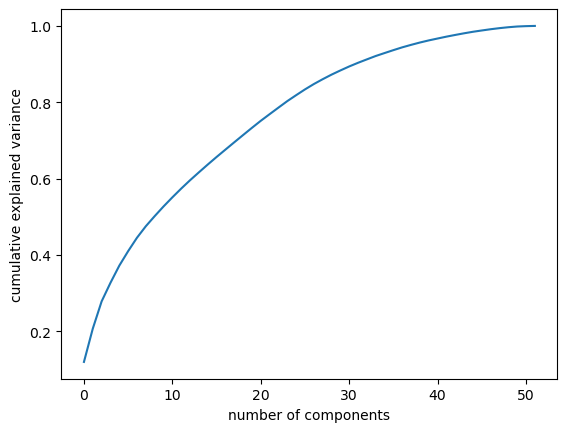

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
np.cumsum(pca.explained_variance_ratio_)[31]

0.9033819287689843

We see that 31 numerical columns out of 52 columns capture 90% of the variance




In [ ]:
df_num_pca.iloc[:,:31]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,3.06,5.49,-1.80,1.49,0.08,-3.36,0.49,-0.34,1.53,2.58,0.41,-0.92,0.58,0.41,-0.47,-1.07,0.07,0.11,0.31,-0.14,-0.28,-0.03,0.13,0.16,-0.35,-1.10,-0.64,-1.14,-0.05,1.88,0.07
1,-0.63,-1.19,-2.42,0.11,-0.15,0.87,-0.25,0.99,-2.55,-0.72,1.71,1.38,-1.01,-0.13,-0.59,-0.44,-0.11,-0.05,0.16,0.64,-1.31,-0.18,0.33,0.30,-0.05,0.86,-1.23,-0.38,-0.18,-0.58,-0.43
2,-0.42,-0.00,0.06,-0.73,0.07,0.56,-0.14,-1.05,-2.77,0.82,1.40,-1.70,-1.66,-0.07,-0.36,-0.67,0.48,0.26,-0.20,-1.31,-1.71,-0.07,0.25,1.00,2.18,-0.05,-0.97,-0.97,-0.74,-0.40,-0.70
3,-1.09,-0.94,1.50,-0.03,0.94,-0.36,-0.20,0.68,-0.23,0.42,-0.33,-2.13,0.90,0.21,-0.37,-0.67,0.28,0.05,0.10,-0.01,0.35,0.04,-0.38,0.35,1.47,-0.75,-0.11,-0.92,-0.75,0.60,0.26
4,-3.46,1.25,-1.56,0.53,1.19,-2.11,0.16,-0.68,-1.04,1.02,0.16,0.15,0.26,0.62,-1.17,-0.66,-0.03,-0.11,0.25,0.46,1.36,0.13,-0.11,-0.32,-1.14,-0.10,-0.20,-0.19,-0.35,-0.15,1.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84081,2.43,-0.35,2.77,-0.72,-0.76,-0.94,0.32,-0.81,0.24,0.40,0.56,-0.19,0.11,-0.01,0.03,0.04,-0.01,-0.06,0.02,0.19,0.64,0.10,0.00,0.64,-0.46,-0.55,0.69,0.34,0.88,-0.04,0.05
84082,-0.06,0.73,1.82,-1.65,-0.00,-0.07,0.06,0.89,-0.33,1.19,1.24,-0.44,-0.36,0.88,-0.62,-0.71,-0.39,-0.47,0.69,2.17,0.86,0.28,-0.28,-0.44,1.29,-0.22,0.93,-0.04,-0.08,0.19,-0.85
84083,2.96,-1.62,-1.11,-2.71,2.63,-0.57,-0.01,-0.66,-2.49,-0.27,3.02,-3.46,-0.40,0.49,-0.72,-0.07,0.74,-0.15,-0.25,-2.30,2.98,0.27,-0.26,-0.51,3.36,-0.34,-0.39,-1.34,0.75,0.71,-0.65
84084,3.39,-5.13,-2.03,2.34,0.89,1.75,-0.84,0.64,-0.84,1.10,-0.03,1.51,3.27,-0.74,-1.04,-0.91,0.47,0.31,0.38,0.23,0.18,0.02,-1.83,-1.92,0.98,1.48,1.96,-2.10,0.23,0.13,-1.03


In [ ]:
#renaming columns
cols=[]
for col in range(0,len(df_num_pca.columns)):
  cols.append(f"PC{col}") 
df_num_pca.columns = cols

In [ ]:
df_num_pca.iloc[:,:31]

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
0,3.06,5.49,-1.80,1.49,0.08,-3.36,0.49,-0.34,1.53,2.58,0.41,-0.92,0.58,0.41,-0.47,-1.07,0.07,0.11,0.31,-0.14,-0.28,-0.03,0.13,0.16,-0.35,-1.10,-0.64,-1.14,-0.05,1.88,0.07
1,-0.63,-1.19,-2.42,0.11,-0.15,0.87,-0.25,0.99,-2.55,-0.72,1.71,1.38,-1.01,-0.13,-0.59,-0.44,-0.11,-0.05,0.16,0.64,-1.31,-0.18,0.33,0.30,-0.05,0.86,-1.23,-0.38,-0.18,-0.58,-0.43
2,-0.42,-0.00,0.06,-0.73,0.07,0.56,-0.14,-1.05,-2.77,0.82,1.40,-1.70,-1.66,-0.07,-0.36,-0.67,0.48,0.26,-0.20,-1.31,-1.71,-0.07,0.25,1.00,2.18,-0.05,-0.97,-0.97,-0.74,-0.40,-0.70
3,-1.09,-0.94,1.50,-0.03,0.94,-0.36,-0.20,0.68,-0.23,0.42,-0.33,-2.13,0.90,0.21,-0.37,-0.67,0.28,0.05,0.10,-0.01,0.35,0.04,-0.38,0.35,1.47,-0.75,-0.11,-0.92,-0.75,0.60,0.26
4,-3.46,1.25,-1.56,0.53,1.19,-2.11,0.16,-0.68,-1.04,1.02,0.16,0.15,0.26,0.62,-1.17,-0.66,-0.03,-0.11,0.25,0.46,1.36,0.13,-0.11,-0.32,-1.14,-0.10,-0.20,-0.19,-0.35,-0.15,1.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84081,2.43,-0.35,2.77,-0.72,-0.76,-0.94,0.32,-0.81,0.24,0.40,0.56,-0.19,0.11,-0.01,0.03,0.04,-0.01,-0.06,0.02,0.19,0.64,0.10,0.00,0.64,-0.46,-0.55,0.69,0.34,0.88,-0.04,0.05
84082,-0.06,0.73,1.82,-1.65,-0.00,-0.07,0.06,0.89,-0.33,1.19,1.24,-0.44,-0.36,0.88,-0.62,-0.71,-0.39,-0.47,0.69,2.17,0.86,0.28,-0.28,-0.44,1.29,-0.22,0.93,-0.04,-0.08,0.19,-0.85
84083,2.96,-1.62,-1.11,-2.71,2.63,-0.57,-0.01,-0.66,-2.49,-0.27,3.02,-3.46,-0.40,0.49,-0.72,-0.07,0.74,-0.15,-0.25,-2.30,2.98,0.27,-0.26,-0.51,3.36,-0.34,-0.39,-1.34,0.75,0.71,-0.65
84084,3.39,-5.13,-2.03,2.34,0.89,1.75,-0.84,0.64,-0.84,1.10,-0.03,1.51,3.27,-0.74,-1.04,-0.91,0.47,0.31,0.38,0.23,0.18,0.02,-1.83,-1.92,0.98,1.48,1.96,-2.10,0.23,0.13,-1.03


## **Chi-squared Test**

In [50]:
df_obj1 = df_obj.drop('loan_status', axis=1)
for col in df_obj1.columns:
    contingency_table = pd.crosstab(df_obj1[col], df_obj['loan_status'])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    print(f"\nContingency table for {col} and Loan Status:\n{contingency_table}\n")
    print(f"Chi-squared test results for {col} and Loan Status:\nchi2 = {chi2}\np-value = {p}\ndof = {dof}\n")
    if p < 0.05:
        print(f"There is a significant association between {col} and Loan Status with p-value of {p}.\n")
    else:
        print(f"There is no significant association between {col} and Loan Status with p-value of {p}.\n")

    print('--------------------------------------------------------------------------------------------------------')


Contingency table for grade and Loan Status:
loan_status     0      1
grade                   
0            1250  26965
1            1828  22095
2            2226  15930
3            2314  11478

Chi-squared test results for grade and Loan Status:
chi2 = 2015.3193161884103
p-value = 0.0
dof = 3

There is a significant association between grade and Loan Status with p-value of 0.0.

--------------------------------------------------------------------------------------------------------

Contingency table for sub_grade and Loan Status:
loan_status    0     1
sub_grade             
0            158  5026
1            123  3192
2            194  4698
3            350  6931
4            425  7118
5            258  4097
6            356  4841
7            305  3485
8            403  4275
9            506  5397
10           388  3316
11           414  3159
12           416  3155
13           366  2541
14           642  3759
15           337  1968
16           696  4034
17           589  2901


We see that between categorical columns and our target column loan status there are columns such as hardship_flag, verification_status_Source, verification_status_Verified, purpose_house, purpose_major_purchase, purpose_medical, purpose_other, purpose_renewable_energy, purpose_small_business, purpose_vacation, title_Car financing, title_Green loan, title_Home buying, title_Major purchase, title_Medical expenses, title_Other, title_Vacation and few states which have no significant association with loan status

## **Dataset Preparation for Modelling**

In [65]:
#merging numerical and categorical columns which were hot encoded
pd.set_option('display.max_columns', None)
# df = pd.merge(df_num_pca.iloc[:,:31], df_obj, left_index=True, right_index=True)
# df
df = pd.merge(df_num, df_obj, left_index=True, right_index=True)
df

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,bc_open_to_buy,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_il_tl,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,pct_tl_nvr_dlq,grade,sub_grade,emp_length,loan_status,hardship_flag,term_ 60 months,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,title_Car financing,title_Credit card refinancing,title_Debt consolidation,title_Green loan,title_Home buying,title_Home improvement,title_Major purchase,title_Medical expenses,title_Moving and relocation,title_Other,title_Vacation,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w,application_type_Joint App
0,18000.00,0.16,125000.00,39.05,0.00,0.00,28.00,0.00,66764.00,0.58,65.00,15903.68,2272.60,0.00,0.00,438.50,0.00,0.00,0.00,228273.00,0.00,4.00,0.00,2.00,14.00,161509.00,59.00,1.00,4.00,12953.00,58.00,115400.00,0.00,1.00,0.00,20672.00,0.00,0.00,159.00,465.00,12.00,12.00,0.00,12.00,14.00,0.00,15.00,20.00,0.00,0.00,0.00,100.00,1,9,2,1,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,20000.00,0.10,52000.00,23.66,0.00,1.00,14.00,1.00,14262.00,0.36,24.00,0.00,1398.32,0.00,0.00,15585.47,0.00,0.00,0.00,252180.00,1.00,1.00,0.00,0.00,33.00,9459.00,29.00,2.00,3.00,2500.00,33.00,39900.00,1.00,2.00,5.00,2654.00,0.00,0.00,75.00,103.00,2.00,2.00,2.00,8.00,4.00,0.00,3.00,3.00,0.00,0.00,0.00,100.00,0,3,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,20000.00,0.08,35000.00,24.11,0.00,1.00,12.00,1.00,13855.00,0.47,32.00,14416.04,1347.53,0.00,0.00,630.99,0.00,0.00,0.00,83177.00,1.00,2.00,0.00,1.00,13.00,7322.00,70.00,0.00,2.00,3076.00,53.00,29300.00,0.00,9.00,3.00,2924.00,0.00,0.00,145.00,318.00,18.00,1.00,3.00,29.00,2.00,0.00,1.00,12.00,0.00,0.00,0.00,100.00,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,4800.00,0.10,72000.00,16.75,0.00,0.00,10.00,0.00,7201.00,0.55,20.00,2863.25,369.05,0.00,0.00,155.32,0.00,0.00,0.00,34094.00,0.00,2.00,1.00,3.00,7.00,21203.00,86.00,1.00,2.00,1516.00,76.00,13200.00,1.00,6.00,2.00,2559.00,0.00,0.00,146.00,306.00,12.00,7.00,2.00,14.00,8.00,2.00,4.00,9.00,0.00,0.00,0.00,85.00,0,3,2,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [66]:
#initialsing df into X and y
X = df.drop('loan_status', axis=1)
y = df['loan_status']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, test_size=0.2)

In [68]:
# Standardize the numerical features
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.fit_transform(X_train)
X_test_scaled = X_scaler.fit_transform(X_test)

##**Lazy Predictor**

In [ ]:
# Define and fit the model
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
model1, prediction1 = clf.fit(X_train_scaled, X_test_scaled, y_train, y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [12:10<00:00, 25.20s/it]


In [ ]:
model1

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LogisticRegression,0.96,0.78,0.78,0.95,1.49
PassiveAggressiveClassifier,0.92,0.77,0.77,0.92,0.62
DecisionTreeClassifier,0.94,0.77,0.77,0.94,3.73
BaggingClassifier,0.96,0.77,0.77,0.95,23.13
SGDClassifier,0.95,0.77,0.77,0.95,1.06
Perceptron,0.94,0.77,0.77,0.94,0.51
LGBMClassifier,0.96,0.76,0.76,0.95,0.91
LinearSVC,0.96,0.76,0.76,0.95,20.71
CalibratedClassifierCV,0.96,0.76,0.76,0.95,75.69


##**1. LinearSVC Classifier:**

In [ ]:
#initialsing svc classifier
clf_svc = svm.LinearSVC(random_state=42)
clf_svc.fit(X_train_scaled, y_train)
y_pred_train_svc = clf_svc.predict(X_train_scaled) #predicting from the model
y_pred_test_svc = clf_svc.predict(X_test_scaled) 


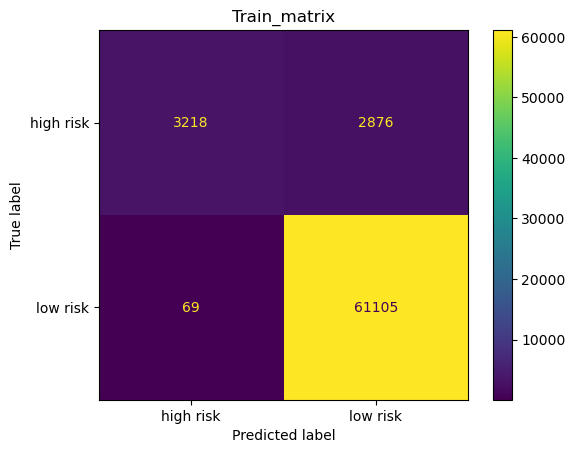

In [ ]:
#displaying confusion matrix
display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_train, y_pred_train_svc), 
                                  display_labels=['high risk', 'low risk'])
display.plot()
plt.title("Train_matrix")
plt.show()

In [ ]:
report_svc_train = classification_report(y_train, y_pred_train_svc) #displaying classification report
print(report_svc_train)

              precision    recall  f1-score   support

           0       0.98      0.53      0.69      6094
           1       0.96      1.00      0.98     61174

    accuracy                           0.96     67268
   macro avg       0.97      0.76      0.83     67268
weighted avg       0.96      0.96      0.95     67268



In [ ]:
print("Training set Performance:") #Evaluating performance on training set
print('Balanced Accuracy Score', balanced_accuracy_score(y_train, y_pred_train_svc))
print('Accuracy Score: ', accuracy_score(y_train, y_pred_train_svc))
print('Precision Score: ',precision_score(y_train, y_pred_train_svc, average='weighted'))
print('Recall Score: ',recall_score(y_train, y_pred_train_svc, average='weighted'))
print('F1 Score: ',f1_score(y_train, y_pred_train_svc, average='weighted'))

Training set Performance:
Balanced Accuracy Score 0.7634662285498764
Accuracy Score:  0.9562198965332699
Precision Score:  0.9572196747115748
Recall Score:  0.9562198965332699
F1 Score:  0.9501608693835133


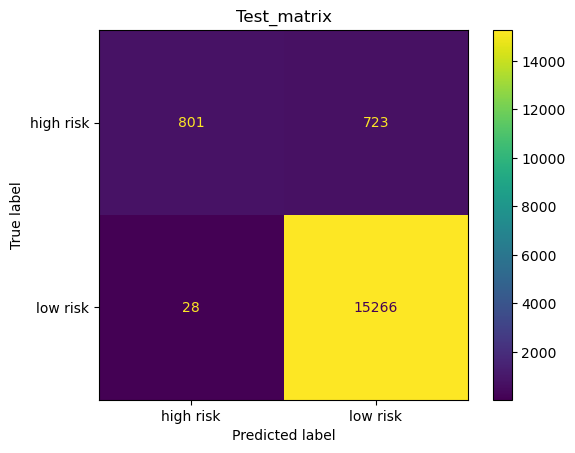

In [ ]:
display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred_test_svc), 
                                  display_labels=['high risk', 'low risk'])
display.plot()
plt.title("Test_matrix")
plt.show()

In [ ]:
report_svc_test = classification_report(y_test, y_pred_test_svc)
print(report_svc_test)

              precision    recall  f1-score   support

           0       0.97      0.53      0.68      1524
           1       0.95      1.00      0.98     15294

    accuracy                           0.96     16818
   macro avg       0.96      0.76      0.83     16818
weighted avg       0.96      0.96      0.95     16818



In [ ]:
print("Test set Performance:") # Evaluate performance on testing data
print('Balanced Accuracy Score', balanced_accuracy_score(y_test, y_pred_test_svc))
print('Accuracy Score: ', accuracy_score(y_test, y_pred_test_svc))
print('Precision Score: ',precision_score(y_test, y_pred_test_svc, average='weighted'))
print('Recall Score: ',recall_score(y_test, y_pred_test_svc, average='weighted'))
print('F1 Score: ',f1_score(y_test, y_pred_test_svc, average='weighted'))

Test set Performance:
Balanced Accuracy Score 0.7618798839336922
Accuracy Score:  0.9553454631941967
Precision Score:  0.9558183406687925
Recall Score:  0.9553454631941967
F1 Score:  0.9492467457951946


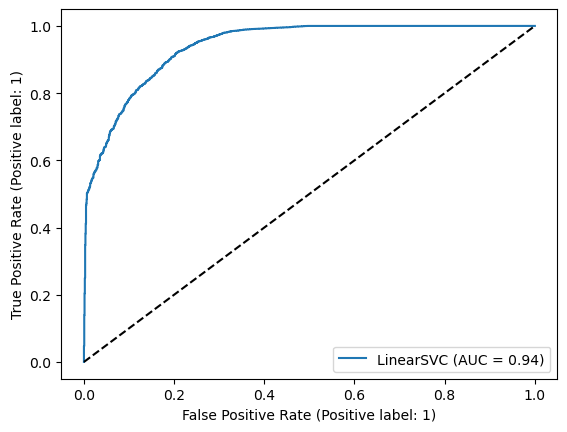

In [ ]:
disp = RocCurveDisplay.from_estimator(clf_svc, X_test_scaled, y_test) #displaying roc curve
plt.plot([0, 1], [0, 1], 'k--')

##**2.Logistic Regression:**

In [ ]:
# Create a logistic regression 
clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)
y_pred_train_lr = clf_lr.predict(X_train) #predicting
y_pred_test_lr = clf_lr.predict(X_test) 

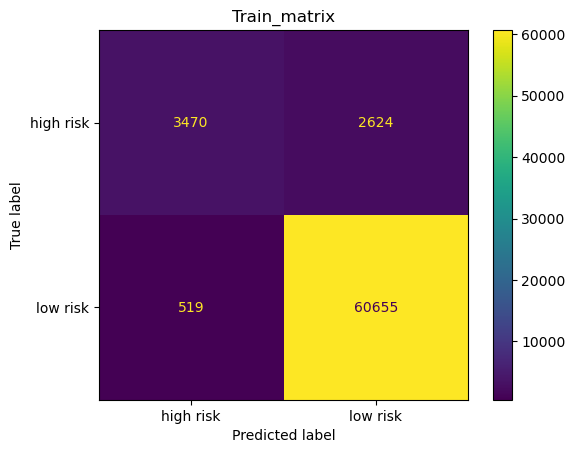

In [ ]:
display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_train, y_pred_train_lr), 
                                   display_labels=['high risk', 'low risk'])
display.plot()
plt.title("Train_matrix")
plt.show()

In [ ]:
report_lr_train = classification_report(y_train, y_pred_train_lr)
print(report_lr_train)

              precision    recall  f1-score   support

           0       0.87      0.57      0.69      6094
           1       0.96      0.99      0.97     61174

    accuracy                           0.95     67268
   macro avg       0.91      0.78      0.83     67268
weighted avg       0.95      0.95      0.95     67268



In [ ]:
print("Training set Performance:") #Evaluating performance on training set
print('Balanced Accuracy Score', balanced_accuracy_score(y_train, y_pred_train_lr))
print('Accuracy Score: ', accuracy_score(y_train, y_pred_train_lr))
print('Precision Score: ',precision_score(y_train, y_pred_train_lr, average='weighted'))
print('Recall Score: ',recall_score(y_train, y_pred_train_lr, average='weighted'))
print('F1 Score: ',f1_score(y_train, y_pred_train_lr, average='weighted'))

Training set Performance:
Balanced Accuracy Score 0.780464270226237
Accuracy Score:  0.953276446452994
Precision Score:  0.9505026379021289
Recall Score:  0.953276446452994
F1 Score:  0.9487944144418754


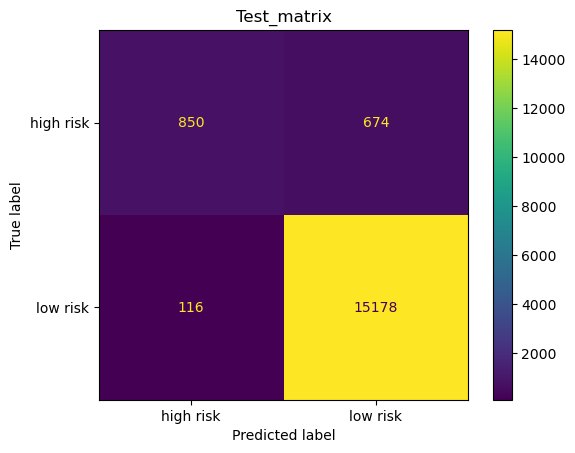

In [ ]:
display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred_test_lr), 
                                  display_labels=['high risk', 'low risk'])
display.plot()
plt.title("Test_matrix")
plt.show()

In [ ]:
report_lr_test = classification_report(y_test, y_pred_test_lr)
print(report_lr_test)

              precision    recall  f1-score   support

           0       0.88      0.56      0.68      1524
           1       0.96      0.99      0.97     15294

    accuracy                           0.95     16818
   macro avg       0.92      0.78      0.83     16818
weighted avg       0.95      0.95      0.95     16818



In [ ]:
print("Test set Performance:") # Evaluate performance on testing data
print('Balanced Accuracy Score', balanced_accuracy_score(y_test, y_pred_test_lr))
print('Accuracy Score: ', accuracy_score(y_test, y_pred_test_lr))
print('Precision Score: ',precision_score(y_test, y_pred_test_lr, average='weighted'))
print('Recall Score: ',recall_score(y_test, y_pred_test_lr, average='weighted'))
print('F1 Score: ',f1_score(y_test, y_pred_test_lr, average='weighted'))

Test set Performance:
Balanced Accuracy Score 0.7750790542119858
Accuracy Score:  0.953026519205613
Precision Score:  0.9504530263405578
Recall Score:  0.953026519205613
F1 Score:  0.948184005165446


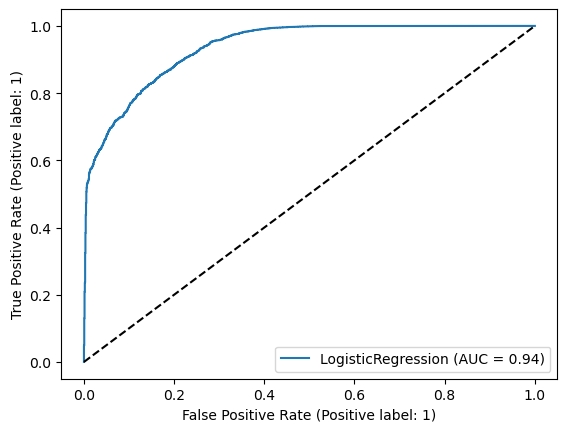

In [ ]:
disp = RocCurveDisplay.from_estimator(clf_lr, X_test_scaled, y_test)
plt.plot([0, 1], [0, 1], 'k--')

##**3. Logical Regression with SMOTE over-sampling:**

In [ ]:
# Create a SMOTE object
sm = SMOTE()
# Resample the training data
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)
clf_lr_smote = clf_lr.fit(X_train_resampled, y_train_resampled)
y_pred_train_lr_smote = clf_lr_smote.predict(X_train_scaled) #predicting fromm knn model
y_pred_test_lr_smote = clf_lr_smote.predict(X_test_scaled) #predicting fromm knn model

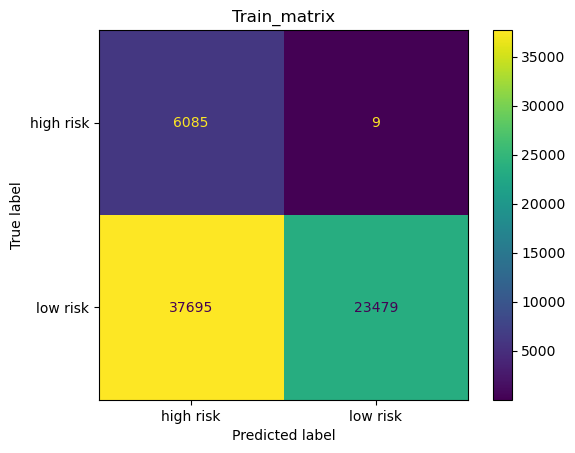

In [ ]:
display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_train, y_pred_train_lr_smote), 
                                  display_labels=['high risk', 'low risk'])
display.plot()
plt.title("Train_matrix")
plt.show()

In [ ]:
report_lr_smote_train = classification_report(y_train, y_pred_train_lr_smote)
print(report_lr_smote_train)

              precision    recall  f1-score   support

           0       0.14      1.00      0.24      6094
           1       1.00      0.38      0.55     61174

    accuracy                           0.44     67268
   macro avg       0.57      0.69      0.40     67268
weighted avg       0.92      0.44      0.53     67268



In [ ]:
print("Training set Performance:") #Evaluating performance on training set
print('Balanced Accuracy Score', balanced_accuracy_score(y_train, y_pred_train_lr_smote))
print('Accuracy Score: ', accuracy_score(y_train, y_pred_train_lr_smote))
print('Precision Score: ',precision_score(y_train, y_pred_train_lr_smote, average='weighted'))
print('Recall Score: ',recall_score(y_train, y_pred_train_lr_smote, average='weighted'))
print('F1 Score: ',f1_score(y_train, y_pred_train_lr_smote, average='weighted'))

Training set Performance:
Balanced Accuracy Score 0.6911649917790064
Accuracy Score:  0.43949574834988403
Precision Score:  0.9216502234010665
Recall Score:  0.43949574834988403
F1 Score:  0.5265110632246695


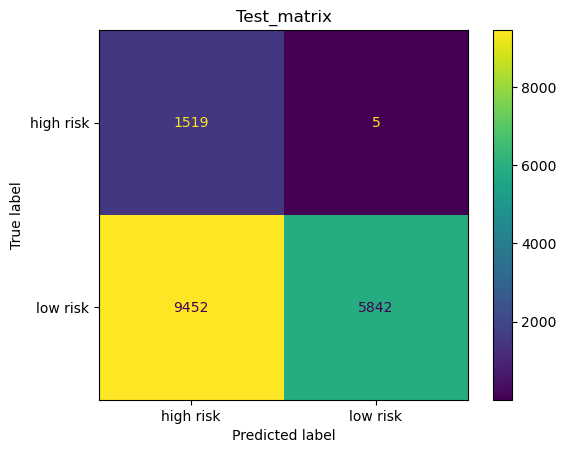

In [ ]:
display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred_test_lr_smote), 
                                  display_labels=['high risk', 'low risk'])
display.plot()
plt.title("Test_matrix")
plt.show()

In [ ]:
report_lr_smote_test = classification_report(y_test, y_pred_test_lr_smote)
print(report_lr_smote_test)

              precision    recall  f1-score   support

           0       0.14      1.00      0.24      1524
           1       1.00      0.38      0.55     15294

    accuracy                           0.44     16818
   macro avg       0.57      0.69      0.40     16818
weighted avg       0.92      0.44      0.52     16818



In [ ]:
print("Test set Performance:") # Evaluate performance on testing data
print('Balanced Accuracy Score', balanced_accuracy_score(y_train, y_pred_train_lr_smote))
print('Accuracy Score: ', accuracy_score(y_test, y_pred_test_lr_smote))
print('Precision Score: ',precision_score(y_test, y_pred_test_lr_smote, average='weighted'))
print('Recall Score: ',recall_score(y_test, y_pred_test_lr_smote, average='weighted'))
print('F1 Score: ',f1_score(y_test, y_pred_test_lr_smote, average='weighted'))

Test set Performance:
Balanced Accuracy Score 0.6911649917790064
Accuracy Score:  0.43768581281959806
Precision Score:  0.9211516431447702
Recall Score:  0.43768581281959806
F1 Score:  0.5246211624552783


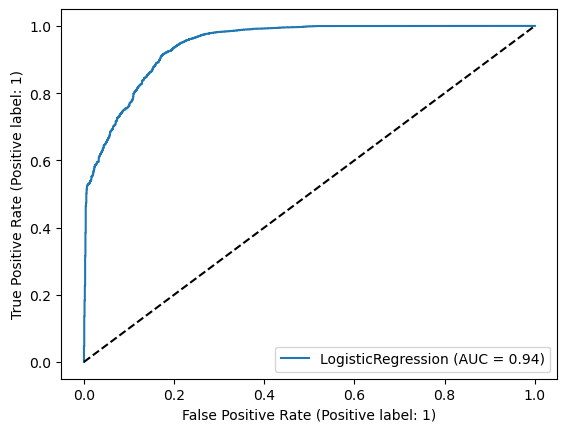

In [ ]:
disp = RocCurveDisplay.from_estimator(clf_lr_smote, X_test_scaled, y_test)
plt.plot([0, 1], [0, 1], 'k--')

##**4. XGB Classifier**

In [69]:
# Create the XGBoost model
clf_xgb = xgb.XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.5, colsample_bytree=0.5)
# Train the XGBoost model on the training data
clf_xgb.fit(X_train_scaled, y_train)
y_pred_train_xgb = clf_xgb.predict(X_train_scaled) #predicting 
y_pred_test_xgb = clf_xgb.predict(X_test_scaled) 

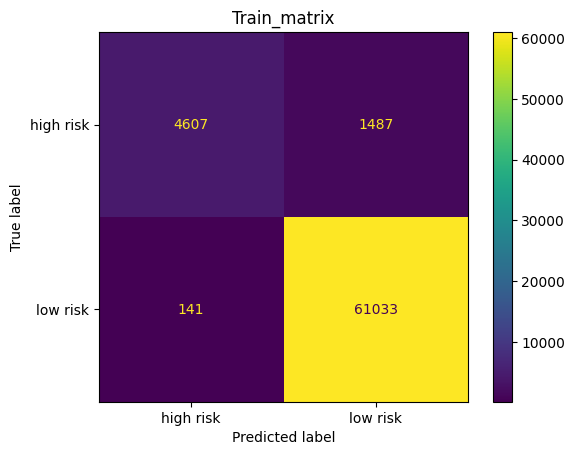

In [70]:
display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_train, y_pred_train_xgb), 
                                  display_labels=['high risk', 'low risk'])
display.plot()
plt.title("Train_matrix")
plt.show()

In [ ]:
report_xgb_train = classification_report(y_train, y_pred_train_xgb)
print(report_xgb_train)

              precision    recall  f1-score   support

           0       0.97      0.75      0.85      6094
           1       0.98      1.00      0.99     61174

    accuracy                           0.98     67268
   macro avg       0.97      0.88      0.92     67268
weighted avg       0.98      0.98      0.97     67268



In [ ]:
print("Training set Performance:") #Evaluating performance on training set
print('Balanced Accuracy Score', balanced_accuracy_score(y_train, y_pred_train_xgb))
print('Accuracy Score: ', accuracy_score(y_train, y_pred_train_xgb))
print('Precision Score: ',precision_score(y_train, y_pred_train_xgb, average='weighted'))
print('Recall Score: ',recall_score(y_train, y_pred_train_xgb, average='weighted'))
print('F1 Score: ',f1_score(y_train, y_pred_train_xgb, average='weighted'))

Training set Performance:
Balanced Accuracy Score 0.8756112659602604
Accuracy Score:  0.9757091038829756
Precision Score:  0.9756333903948182
Recall Score:  0.9757091038829756
F1 Score:  0.9743031522160537


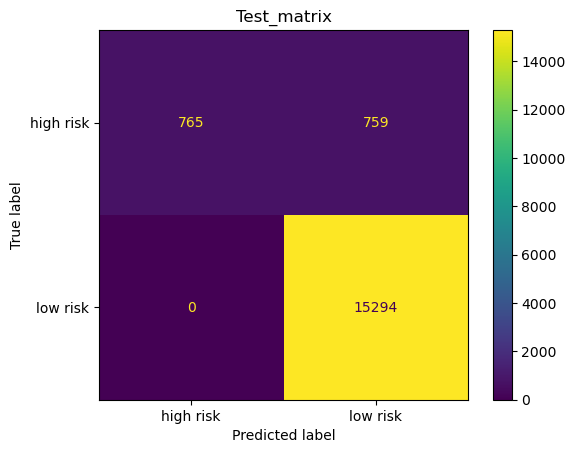

In [ ]:
display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred_test_xgb), 
                                  display_labels=['high risk', 'low risk'])
display.plot()
plt.title("Test_matrix")
plt.show()

In [ ]:
report_xgb_test = classification_report(y_test, y_pred_test_xgb)
print(report_xgb_test)

              precision    recall  f1-score   support

           0       1.00      0.50      0.67      1524
           1       0.95      1.00      0.98     15294

    accuracy                           0.95     16818
   macro avg       0.98      0.75      0.82     16818
weighted avg       0.96      0.95      0.95     16818



In [ ]:
print("Test set Performance:") # Evaluate performance on testing data
print('Balanced Accuracy Score', balanced_accuracy_score(y_test, y_pred_test_xgb))
print('Accuracy Score: ', accuracy_score(y_test, y_pred_test_xgb))
print('Precision Score: ',precision_score(y_test, y_pred_test_xgb, average='weighted'))
print('Recall Score: ',recall_score(y_test, y_pred_test_xgb, average='weighted'))
print('F1 Score: ',f1_score(y_test, y_pred_test_xgb, average='weighted'))

Test set Performance:
Balanced Accuracy Score 0.7509842519685039
Accuracy Score:  0.9548697823760257
Precision Score:  0.9570035788736646
Recall Score:  0.9548697823760257
F1 Score:  0.9479338771397345


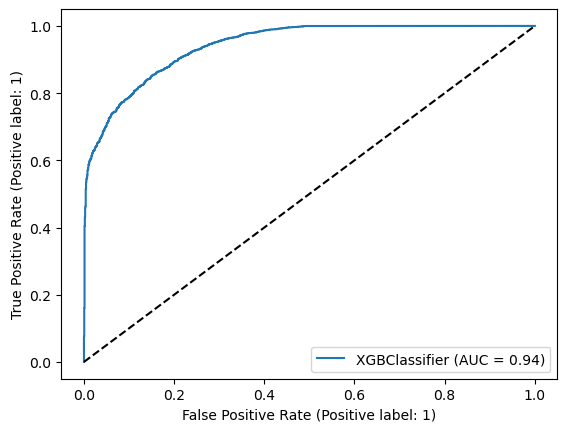

In [ ]:
disp = RocCurveDisplay.from_estimator(clf_xgb, X_test_scaled, y_test)
plt.plot([0, 1], [0, 1], 'k--')

##**5. Bagging Classifier**

In [ ]:
clf_bagging = BaggingClassifier(random_state=42).fit(X_train_scaled, y_train)
y_pred_train_bagging = clf_bagging.predict(X_train_scaled) #predicting 
y_pred_test_bagging = clf_bagging.predict(X_test_scaled) #predicting 

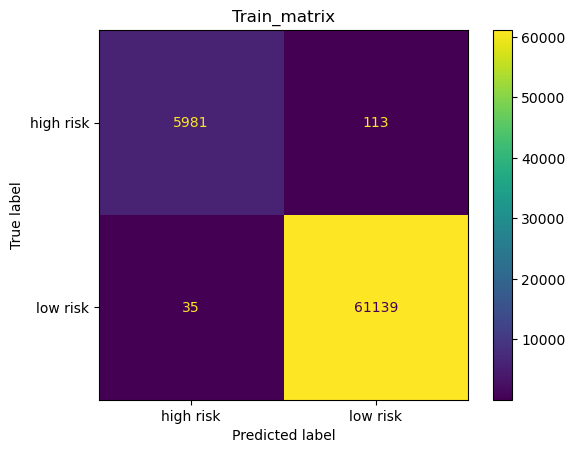

In [ ]:
display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_train, y_pred_train_bagging), 
                                  display_labels=['high risk', 'low risk'])
display.plot()
plt.title("Train_matrix")
plt.show()

In [ ]:
report_bagging_train = classification_report(y_train, y_pred_train_bagging)
print(report_bagging_train)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      6094
           1       1.00      1.00      1.00     61174

    accuracy                           1.00     67268
   macro avg       1.00      0.99      0.99     67268
weighted avg       1.00      1.00      1.00     67268



In [ ]:
print("Training set Performance:") #Evaluating performance on training set
print('Balanced Accuracy Score', balanced_accuracy_score(y_train, y_pred_train_bagging))
print('Accuracy Score: ', accuracy_score(y_train, y_pred_train_bagging))
print('Precision Score: ',precision_score(y_train, y_pred_train_bagging, average='weighted'))
print('Recall Score: ',recall_score(y_train, y_pred_train_bagging, average='weighted'))
print('F1 Score: ',f1_score(y_train, y_pred_train_bagging, average='weighted'))

Training set Performance:
Balanced Accuracy Score 0.9904425162488244
Accuracy Score:  0.9977998453945413
Precision Score:  0.9977952385599171
Recall Score:  0.9977998453945413
F1 Score:  0.9977934607237368


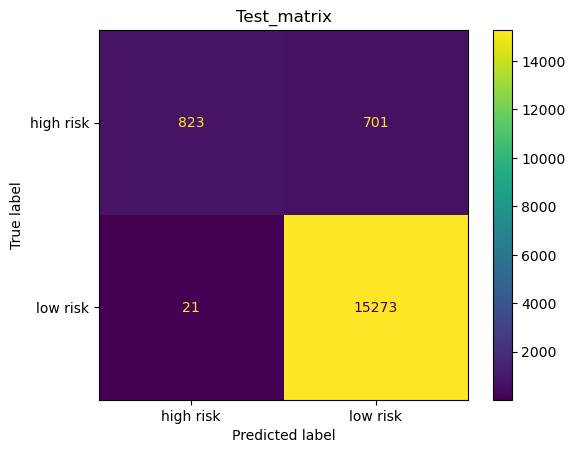

In [ ]:
display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred_test_bagging), 
                                  display_labels=['high risk', 'low risk'])
display.plot()
plt.title("Test_matrix")
plt.show()

In [ ]:
report_bagging_test = classification_report(y_test, y_pred_test_bagging)
print(report_bagging_test)

              precision    recall  f1-score   support

           0       0.98      0.54      0.70      1524
           1       0.96      1.00      0.98     15294

    accuracy                           0.96     16818
   macro avg       0.97      0.77      0.84     16818
weighted avg       0.96      0.96      0.95     16818



In [ ]:
print("Test set Performance:") # Evaluate performance on testing data
print('Balanced Accuracy Score', balanced_accuracy_score(y_test, y_pred_test_bagging))
print('Accuracy Score: ', accuracy_score(y_test, y_pred_test_bagging))
print('Precision Score: ',precision_score(y_test, y_pred_test_bagging, average='weighted'))
print('Recall Score: ',recall_score(y_test, y_pred_test_bagging, average='weighted'))
print('F1 Score: ',f1_score(y_test, y_pred_test_bagging, average='weighted'))

Test set Performance:
Balanced Accuracy Score 0.769326579616936
Accuracy Score:  0.9570698061600666
Precision Score:  0.9578381234588981
Recall Score:  0.9570698061600666
F1 Score:  0.9513726541429909


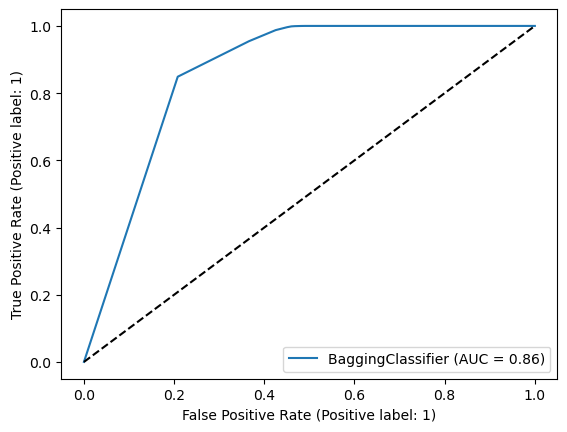

In [ ]:
disp = RocCurveDisplay.from_estimator(clf_bagging, X_test_scaled, y_test)
plt.plot([0, 1], [0, 1], 'k--')

##**6. Decision Tree Classifier**

In [ ]:
clf_dec_tree = DecisionTreeClassifier().fit(X_train_scaled, y_train)
y_pred_train_dec_tree = clf_dec_tree.predict(X_train_scaled) #predicting 
y_pred_test_dec_tree = clf_dec_tree.predict(X_test_scaled) #predicting 

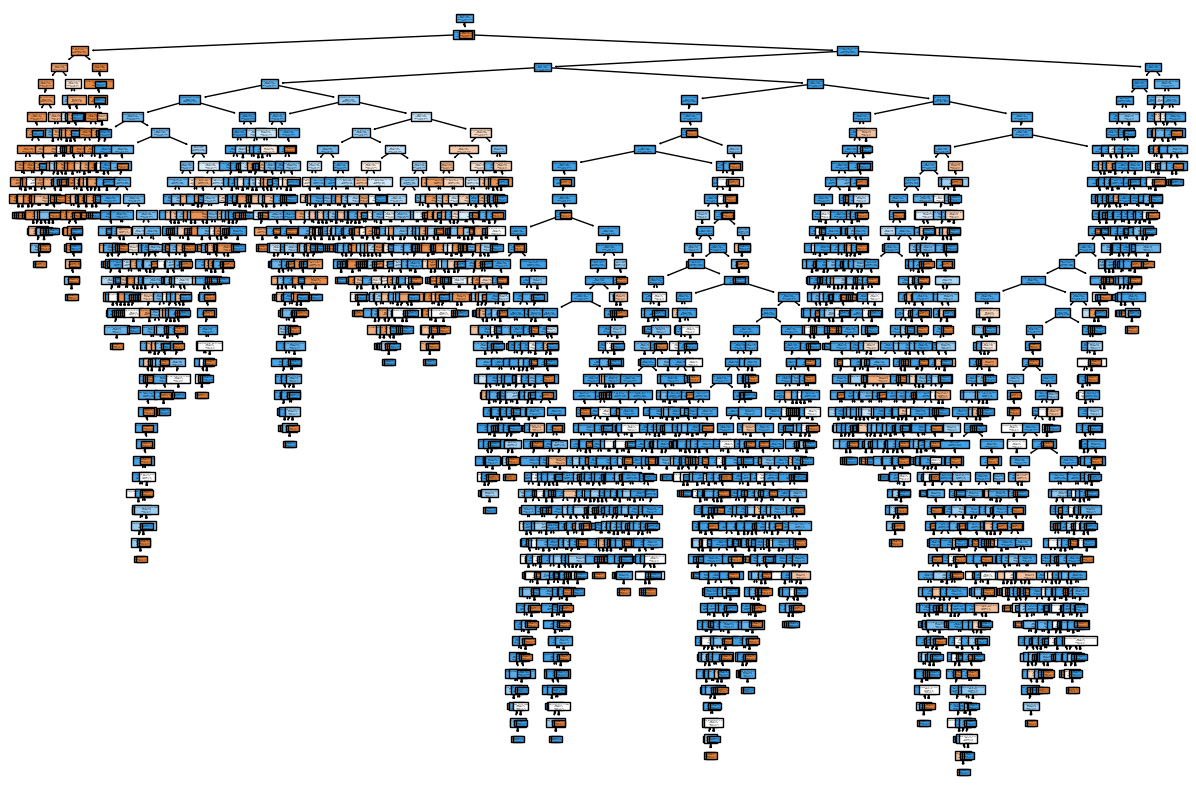

In [ ]:
plt.figure(figsize=(15,10)) #setting figure size
plot_tree(clf_dec_tree, 
          feature_names=X.columns, 
          class_names=['0', '1'], 
          filled=True) #plotting decsiion tree
plt.show()

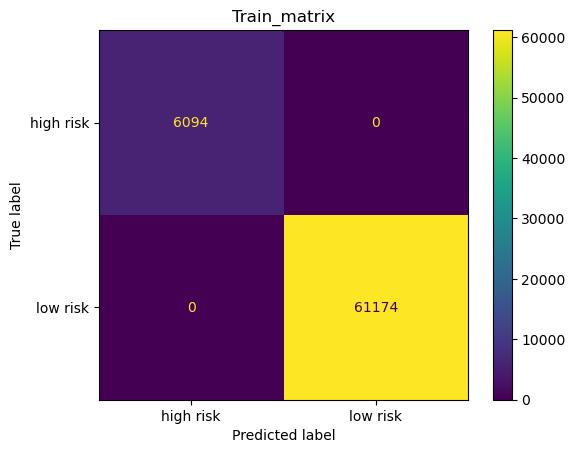

In [ ]:
display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_train, y_pred_train_dec_tree), 
                                  display_labels=['high risk', 'low risk'])
display.plot()
plt.title("Train_matrix")
plt.show()

In [ ]:
report_dec_tree_train = classification_report(y_train, y_pred_train_dec_tree)
print(report_dec_tree_train)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6094
           1       1.00      1.00      1.00     61174

    accuracy                           1.00     67268
   macro avg       1.00      1.00      1.00     67268
weighted avg       1.00      1.00      1.00     67268



In [ ]:
print("Training set Performance:") #Evaluating performance on training set
print('Balanced Accuracy Score', balanced_accuracy_score(y_train, y_pred_train_dec_tree))
print('Accuracy Score: ', accuracy_score(y_train, y_pred_train_dec_tree))
print('Precision Score: ',precision_score(y_train, y_pred_train_dec_tree, average='weighted'))
print('Recall Score: ',recall_score(y_train, y_pred_train_dec_tree, average='weighted'))
print('F1 Score: ',f1_score(y_train, y_pred_train_dec_tree, average='weighted'))

Training set Performance:
Balanced Accuracy Score 1.0
Accuracy Score:  1.0
Precision Score:  1.0
Recall Score:  1.0
F1 Score:  1.0


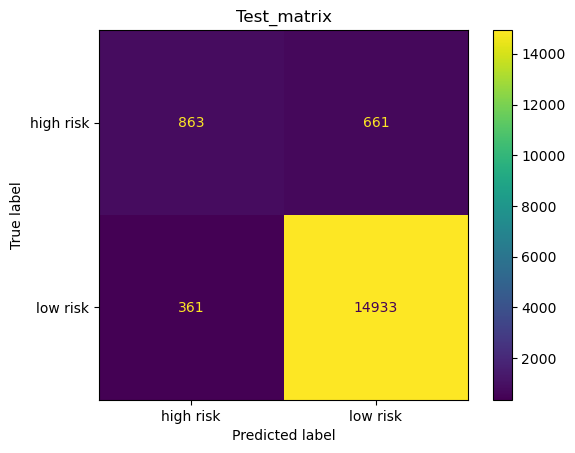

In [ ]:
display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred_test_dec_tree), 
                                  display_labels=['high risk', 'low risk'])
display.plot()
plt.title("Test_matrix")
plt.show()

In [ ]:
report_dec_tree_test = classification_report(y_test, y_pred_test_dec_tree)
print(report_dec_tree_test)

              precision    recall  f1-score   support

           0       0.71      0.57      0.63      1524
           1       0.96      0.98      0.97     15294

    accuracy                           0.94     16818
   macro avg       0.83      0.77      0.80     16818
weighted avg       0.93      0.94      0.94     16818



In [ ]:
print("Test set Performance:") # Evaluate performance on testing data
print('Balanced Accuracy Score', balanced_accuracy_score(y_test, y_pred_test_dec_tree))
print('Accuracy Score: ', accuracy_score(y_test, y_pred_test_dec_tree))
print('Precision Score: ',precision_score(y_test, y_pred_test_dec_tree, average='weighted'))
print('Recall Score: ',recall_score(y_test, y_pred_test_dec_tree, average='weighted'))
print('F1 Score: ',f1_score(y_test, y_pred_test_dec_tree, average='weighted'))

Test set Performance:
Balanced Accuracy Score 0.7713344690779875
Accuracy Score:  0.9392317754786538
Precision Score:  0.9347268425044035
Recall Score:  0.9392317754786538
F1 Score:  0.9362098386408739


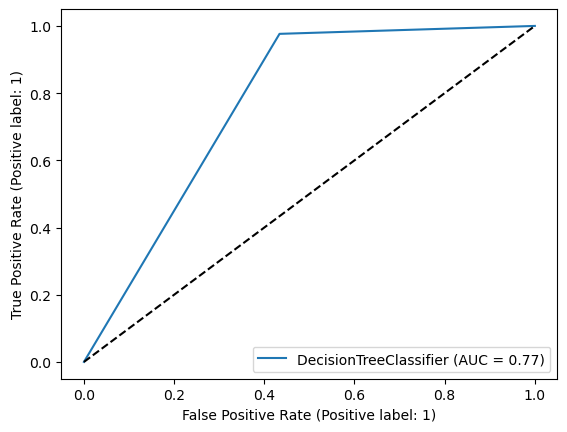

In [ ]:
disp = RocCurveDisplay.from_estimator(clf_dec_tree, X_test_scaled, y_test)
plt.plot([0, 1], [0, 1], 'k--')

##**Hyper Parameter Tunning for XGB Classifier**

In [ ]:
# Define the range of hyperparameters
params = {'max_depth': [3, 5, 7],
          'subsample': [0.5, 0.7, 1.0],
          'colsample_bytree': [0.5, 0.7, 1.0]
          }

clf_xgb_model = xgb.XGBClassifier(learning_rate=0.1,  n_estimators=100)
# search method
grid_search = GridSearchCV(clf_xgb_model, param_grid=params, scoring='roc_auc', cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)
# Selecting best hyperparameters
best_params = grid_search.best_params_
print('Best hyperparameters:', best_params)

Best hyperparameters: {'colsample_bytree': 0.5, 'max_depth': 7, 'subsample': 1.0}


In [ ]:
# Train the final model
final_model = xgb.XGBClassifier(learning_rate=0.1,  n_estimators=100, **best_params)
final_model.fit(X_train_scaled, y_train)
y_pred_train_final = final_model.predict(X_train_scaled) #predicting 
y_pred_test_final = final_model.predict(X_test_scaled) #predicting 

In [71]:
# Train the final model
final_model = xgb.XGBClassifier(learning_rate=0.1,  n_estimators=100, colsample_bytree= 0.5, max_depth= 7, subsample= 1.0)
final_model.fit(X_train_scaled, y_train)
y_pred_train_final = final_model.predict(X_train_scaled) #predicting 
y_pred_test_final = final_model.predict(X_test_scaled) #predicting 

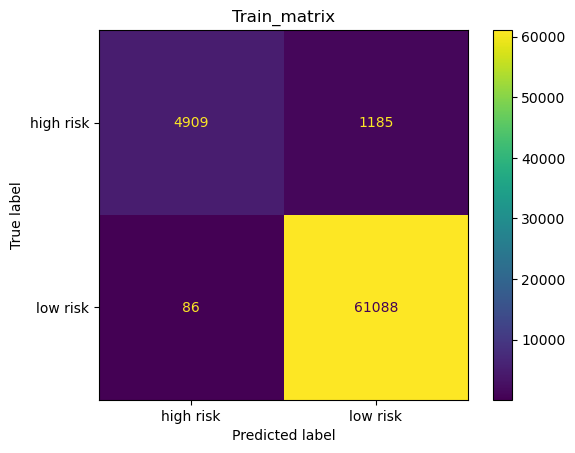

In [ ]:
display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_train, y_pred_train_final), 
                                  display_labels=['high risk', 'low risk'])
display.plot()
plt.title("Train_matrix")
plt.show()

In [ ]:
report_final_train = classification_report(y_train, y_pred_train_final)
print(report_final_train)

              precision    recall  f1-score   support

           0       0.98      0.81      0.89      6094
           1       0.98      1.00      0.99     61174

    accuracy                           0.98     67268
   macro avg       0.98      0.90      0.94     67268
weighted avg       0.98      0.98      0.98     67268



In [ ]:
print("Training set Performance:") #Evaluating performance on training set
print('Balanced Accuracy Score', balanced_accuracy_score(y_train, y_pred_train_final))
print('Accuracy Score: ', accuracy_score(y_train, y_pred_train_final))
print('Precision Score: ',precision_score(y_train, y_pred_train_final, average='weighted'))
print('Recall Score: ',recall_score(y_train, y_pred_train_final, average='weighted'))
print('F1 Score: ',f1_score(y_train, y_pred_train_final, average='weighted'))

Training set Performance:
Balanced Accuracy Score 0.9020703065579674
Accuracy Score:  0.9811054290301481
Precision Score:  0.9811350311333734
Recall Score:  0.9811054290301481
F1 Score:  0.9802532402575319


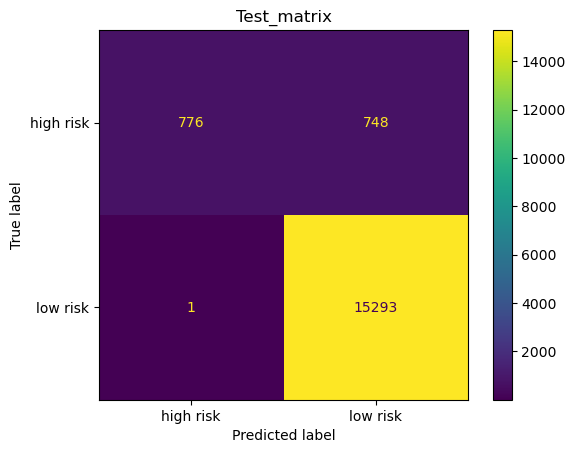

In [ ]:
display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred_test_final), 
                                  display_labels=['high risk', 'low risk'])
display.plot()
plt.title("Test_matrix")
plt.show()

In [73]:
report_final_test = classification_report(y_test, y_pred_test_final)
print(report_final_test)

              precision    recall  f1-score   support

           0       1.00      0.51      0.67      1524
           1       0.95      1.00      0.98     15294

    accuracy                           0.96     16818
   macro avg       0.98      0.75      0.82     16818
weighted avg       0.96      0.96      0.95     16818



In [ ]:
print("Test set Performance:") # Evaluate performance on testing data
print('Balanced Accuracy Score', balanced_accuracy_score(y_test, y_pred_test_final))
print('Accuracy Score: ', accuracy_score(y_test, y_pred_test_final))
print('Precision Score: ',precision_score(y_test, y_pred_test_final, average='weighted'))
print('Recall Score: ',recall_score(y_test, y_pred_test_final, average='weighted'))
print('F1 Score: ',f1_score(y_test, y_pred_test_final, average='weighted'))

Test set Performance:
Balanced Accuracy Score 0.7545604832938448
Accuracy Score:  0.9554643833987394
Precision Score:  0.9574783922285974
Recall Score:  0.9554643833987394
F1 Score:  0.948766175384869


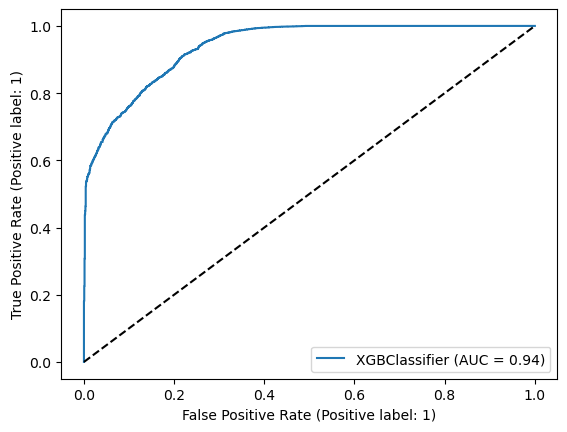

In [ ]:
disp = RocCurveDisplay.from_estimator(final_model, X_test_scaled, y_test)
plt.plot([0, 1], [0, 1], 'k--')

In [ ]:
# Get feature importance scores
importance = final_model.get_booster().get_score(importance_type='weight')
sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True) # Sort features by importance in descending order
for feature, score in sorted_importance: # Print features and their importance scores
    print(feature, score)

f15 521.0
f12 397.0
f11 299.0
f39 249.0
f29 229.0
f8 221.0
f0 213.0
f19 181.0
f25 176.0
f2 173.0
f31 167.0
f3 163.0
f38 163.0
f35 159.0
f26 154.0
f9 146.0
f1 123.0
f47 122.0
f10 118.0
f24 118.0
f44 106.0
f53 103.0
f30 102.0
f40 86.0
f33 81.0
f43 76.0
f51 66.0
f14 63.0
f34 60.0
f32 59.0
f56 57.0
f46 55.0
f42 54.0
f21 52.0
f20 51.0
f22 50.0
f41 49.0
f6 48.0
f28 46.0
f54 44.0
f4 40.0
f23 40.0
f52 38.0
f27 33.0
f5 29.0
f63 26.0
f18 25.0
f57 25.0
f45 18.0
f62 15.0
f115 15.0
f60 13.0
f61 13.0
f87 13.0
f93 12.0
f59 11.0
f7 9.0
f69 8.0
f71 8.0
f75 8.0
f116 8.0
f134 8.0
f36 7.0
f50 7.0
f58 7.0
f74 7.0
f127 7.0
f133 7.0
f97 6.0
f13 5.0
f67 5.0
f85 5.0
f92 5.0
f100 5.0
f108 5.0
f117 5.0
f125 5.0
f131 5.0
f96 4.0
f107 4.0
f109 4.0
f101 3.0
f102 3.0
f103 3.0
f104 3.0
f106 3.0
f126 3.0
f16 2.0
f64 2.0
f68 2.0
f86 2.0
f89 2.0
f95 2.0
f98 2.0
f105 2.0
f113 2.0
f124 2.0
f70 1.0
f80 1.0
f82 1.0
f83 1.0
f88 1.0
f90 1.0
f94 1.0
f110 1.0
f111 1.0
f114 1.0
f119 1.0
f120 1.0
f122 1.0


In [ ]:
X_train.columns[:16]

Index(['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'last_pymnt_amnt'],
      dtype='object')

**'last_pymnt_amnt'** has the highest feature importance in the dataset

># **6- Conclusion**

1. On further evaluation we found the model XGB Classifier to be the best for prediction high-risk loans. We considered a good balanced accuracy and f1 score to choose the model.
2. The F1-score metric is used as the assessment criterion as we need ‘True positive’ to be the target evaluation metric, leading to the combination of Precision(/sensitivity) and recall.
3. Based on the available data, and the XGB Classifier is found to be the model that fits the given issue the best. 
4. For the High_risk(0class) class, the XGB Classifier had the F1-score of 0.67, demonstrating a superior balance between balanced accuracy(0.76), precision(1) and recall(0.50). 
5. The model earned a balanced accuracy of 0.76, which is a positive sign for the model's overall performance. The XGB Classifier is therefore the most suitable option for this purpose. 